In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

## JITGNN openstack all tokens

In [19]:
df = pd.read_csv('../data/test_result_15.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.010518
1,1,0,0.634129
2,2,0,0.022170
3,3,0,0.250673
4,4,0,0.000984
...,...,...,...
1027,1027,0,0.021710
1028,1028,0,0.259689
1029,1029,0,0.750613
1030,1030,0,0.024426


In [20]:
roc_auc_score(df['y_true'], df['y_score'])

0.7474214658691007

In [21]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

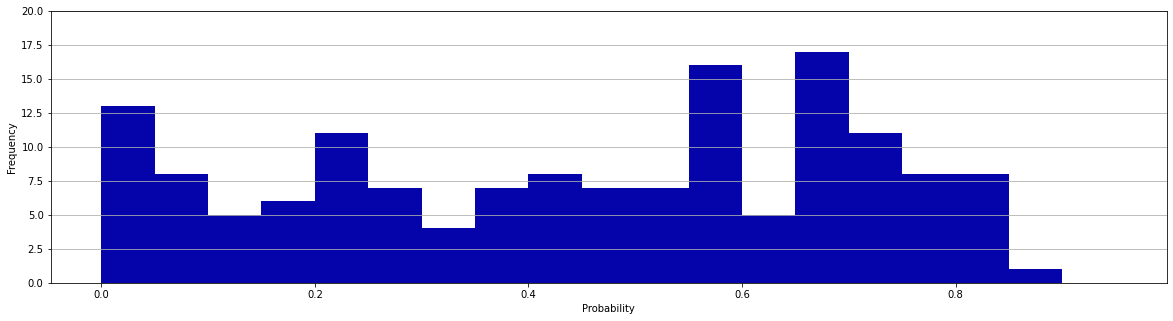

mean=0.45, median=0.50, std=0.26


In [22]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

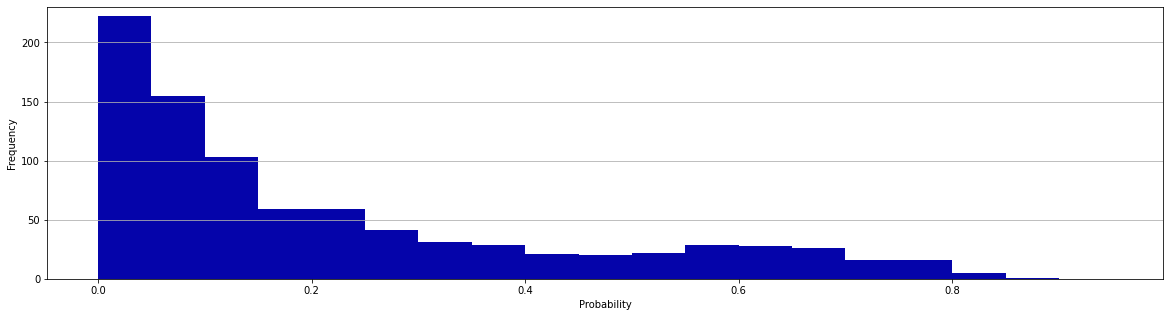

mean=0.22, median=0.13, std=0.22


In [23]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [24]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.25, r=0.79, f1=0.38
at 0.21 threshold, p=0.26, r=0.77, f1=0.39
at 0.22 threshold, p=0.26, r=0.75, f1=0.39
at 0.23 threshold, p=0.27, r=0.74, f1=0.39
at 0.24 threshold, p=0.27, r=0.73, f1=0.39
at 0.25 threshold, p=0.27, r=0.71, f1=0.39
at 0.26 threshold, p=0.28, r=0.71, f1=0.40
at 0.27 threshold, p=0.28, r=0.69, f1=0.40
at 0.28 threshold, p=0.28, r=0.68, f1=0.39
at 0.29 threshold, p=0.29, r=0.68, f1=0.40
at 0.30 threshold, p=0.29, r=0.66, f1=0.40
at 0.31 threshold, p=0.29, r=0.65, f1=0.40
at 0.32 threshold, p=0.30, r=0.65, f1=0.41
at 0.33 threshold, p=0.30, r=0.64, f1=0.41
at 0.34 threshold, p=0.30, r=0.64, f1=0.41
at 0.35 threshold, p=0.31, r=0.64, f1=0.42
at 0.36 threshold, p=0.31, r=0.62, f1=0.41
at 0.37 threshold, p=0.31, r=0.60, f1=0.41
at 0.38 threshold, p=0.31, r=0.59, f1=0.41
at 0.39 threshold, p=0.32, r=0.59, f1=0.41
at 0.40 threshold, p=0.32, r=0.59, f1=0.42
at 0.41 threshold, p=0.33, r=0.59, f1=0.42
at 0.42 threshold, p=0.33, r=0.58, f1=0.42
at 0.43 thr

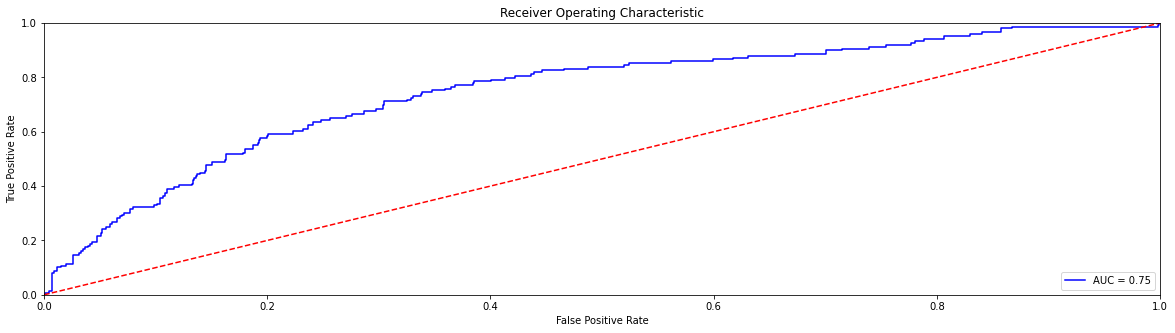

In [25]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

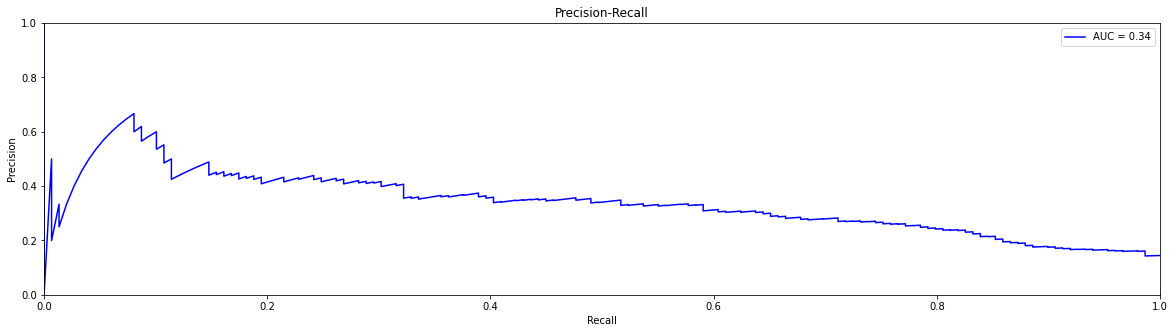

In [26]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN openstack all tokens (attention + tensor net)

In [62]:
df = pd.read_csv('../data/test_result_25.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.032242
1,1,0,0.047741
2,2,0,0.065012
3,3,0,0.032111
4,4,0,0.034199
...,...,...,...
1027,1027,0,0.028221
1028,1028,0,0.031611
1029,1029,0,0.249555
1030,1030,0,0.043916


In [63]:
roc_auc_score(df['y_true'], df['y_score'])

0.7551361663639059

In [64]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

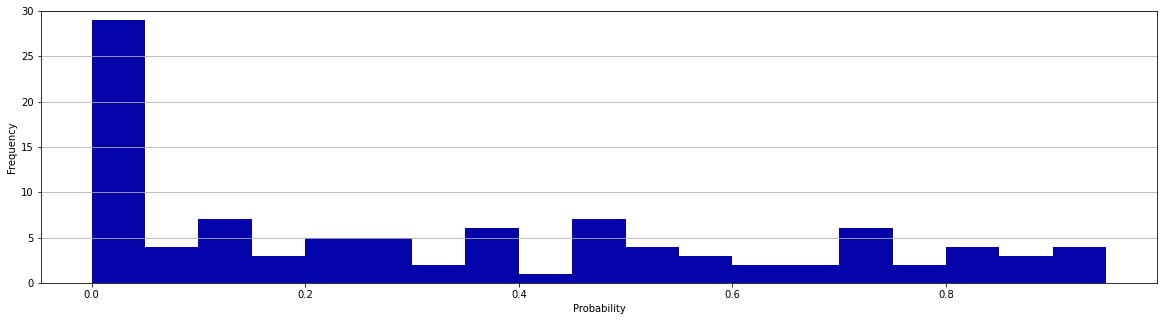

mean=0.56, median=0.59, std=0.40


In [65]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

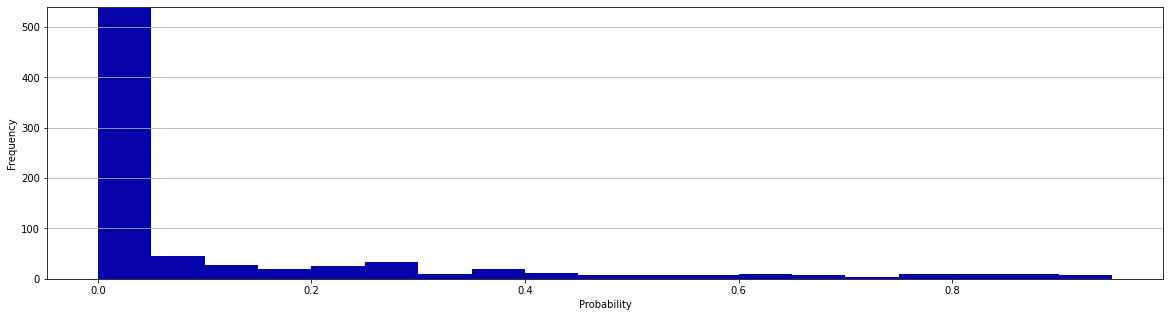

mean=0.21, median=0.04, std=0.32


In [66]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [67]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.30, r=0.71, f1=0.42
at 0.21 threshold, p=0.30, r=0.70, f1=0.42
at 0.22 threshold, p=0.30, r=0.70, f1=0.42
at 0.23 threshold, p=0.30, r=0.70, f1=0.42
at 0.24 threshold, p=0.31, r=0.69, f1=0.43
at 0.25 threshold, p=0.31, r=0.68, f1=0.42
at 0.26 threshold, p=0.32, r=0.68, f1=0.43
at 0.27 threshold, p=0.32, r=0.66, f1=0.43
at 0.28 threshold, p=0.32, r=0.66, f1=0.43
at 0.29 threshold, p=0.32, r=0.65, f1=0.43
at 0.30 threshold, p=0.33, r=0.64, f1=0.44
at 0.31 threshold, p=0.33, r=0.64, f1=0.44
at 0.32 threshold, p=0.33, r=0.64, f1=0.44
at 0.33 threshold, p=0.34, r=0.64, f1=0.44
at 0.34 threshold, p=0.34, r=0.63, f1=0.44
at 0.35 threshold, p=0.34, r=0.63, f1=0.44
at 0.36 threshold, p=0.34, r=0.62, f1=0.44
at 0.37 threshold, p=0.34, r=0.62, f1=0.44
at 0.38 threshold, p=0.35, r=0.62, f1=0.44
at 0.39 threshold, p=0.34, r=0.59, f1=0.43
at 0.40 threshold, p=0.35, r=0.59, f1=0.44
at 0.41 threshold, p=0.35, r=0.59, f1=0.44
at 0.42 threshold, p=0.36, r=0.59, f1=0.44
at 0.43 thr

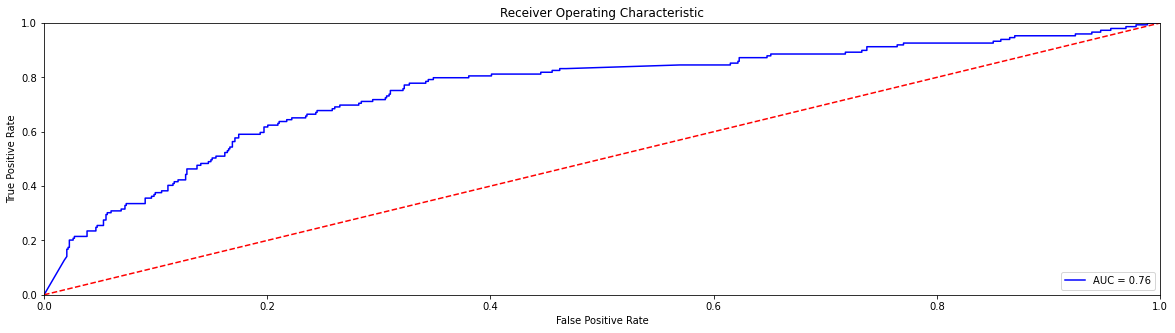

In [68]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

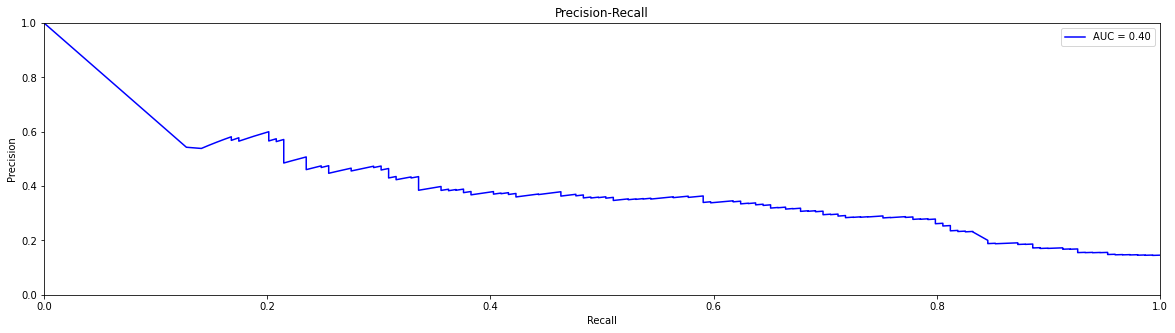

In [69]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN openstack all tokens (attention + tensor net + original metrics)

In [4]:
df = pd.read_csv('../data/test_result_28.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.148246
1,1,0,0.332580
2,2,0,0.200862
3,3,0,0.184358
4,4,0,0.038564
...,...,...,...
1027,1027,0,0.993068
1028,1028,0,0.320602
1029,1029,0,0.349410
1030,1030,0,0.285773


In [5]:
roc_auc_score(df['y_true'], df['y_score'])

0.775779640791384

In [6]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

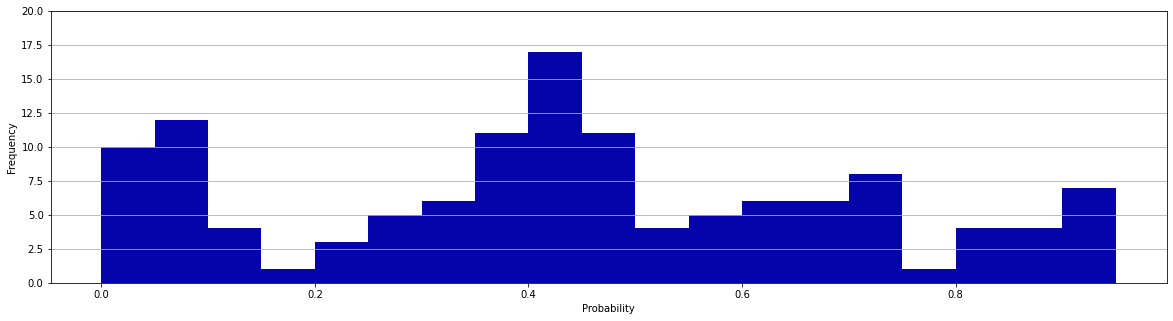

mean=0.53, median=0.47, std=0.31


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

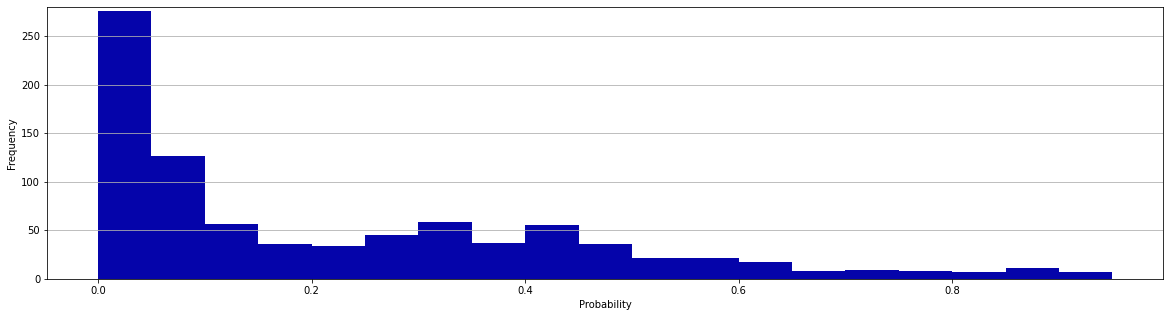

mean=0.24, median=0.13, std=0.24


In [8]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [10]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.4f}, r={:.4f}, f1={:.4f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.2392, r=0.8188, f1=0.3703
at 0.21 threshold, p=0.2401, r=0.8121, f1=0.3706
at 0.22 threshold, p=0.2420, r=0.8121, f1=0.3729
at 0.23 threshold, p=0.2424, r=0.8054, f1=0.3727
at 0.24 threshold, p=0.2484, r=0.8054, f1=0.3797
at 0.25 threshold, p=0.2516, r=0.7987, f1=0.3826
at 0.26 threshold, p=0.2570, r=0.7987, f1=0.3889
at 0.27 threshold, p=0.2627, r=0.7987, f1=0.3953
at 0.28 threshold, p=0.2623, r=0.7852, f1=0.3933
at 0.29 threshold, p=0.2673, r=0.7785, f1=0.3979
at 0.30 threshold, p=0.2695, r=0.7651, f1=0.3986
at 0.31 threshold, p=0.2721, r=0.7651, f1=0.4014
at 0.32 threshold, p=0.2804, r=0.7584, f1=0.4094
at 0.33 threshold, p=0.2917, r=0.7517, f1=0.4203
at 0.34 threshold, p=0.2957, r=0.7383, f1=0.4223
at 0.35 threshold, p=0.3008, r=0.7248, f1=0.4252
at 0.36 threshold, p=0.3051, r=0.7248, f1=0.4294
at 0.37 threshold, p=0.3120, r=0.7181, f1=0.4350
at 0.38 threshold, p=0.3164, r=0.7114, f1=0.4380
at 0.39 threshold, p=0.3200, r=0.6980, f1=0.4388
at 0.40 threshold, p

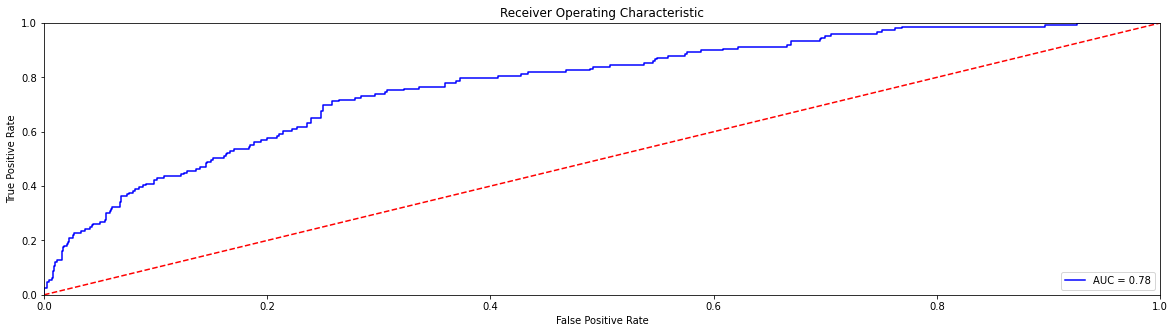

In [11]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

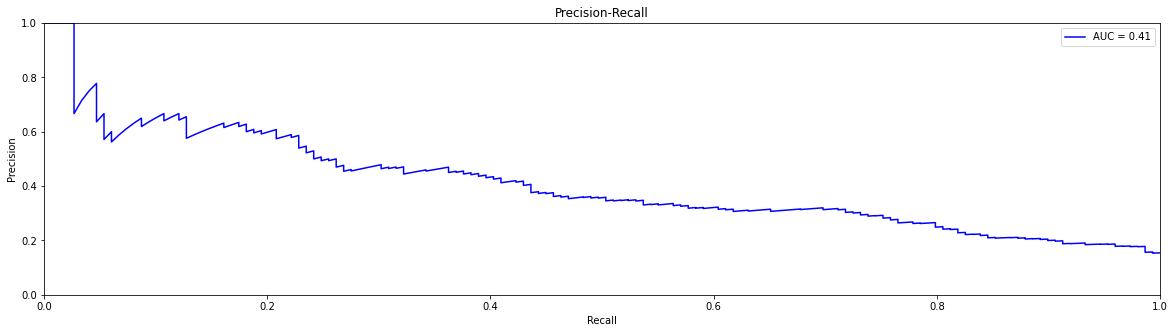

In [12]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN openstack all tokens (attention + tensor net + kamei metrics)

In [13]:
df = pd.read_csv('../data/test_result_29.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.031211
1,1,0,0.243972
2,2,0,0.059090
3,3,0,0.145954
4,4,0,0.030397
...,...,...,...
1027,1027,0,0.578985
1028,1028,0,0.175323
1029,1029,0,0.042862
1030,1030,0,0.031181


In [14]:
roc_auc_score(df['y_true'], df['y_score'])

0.7834411364551901

In [15]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

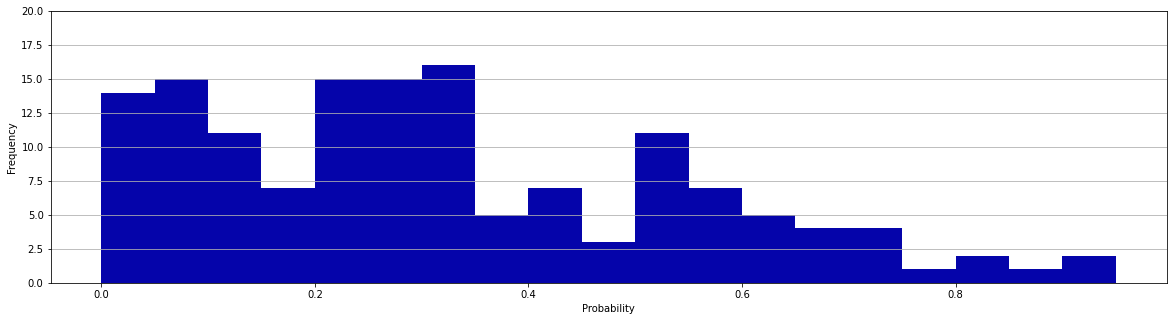

mean=0.34, median=0.30, std=0.25


In [16]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

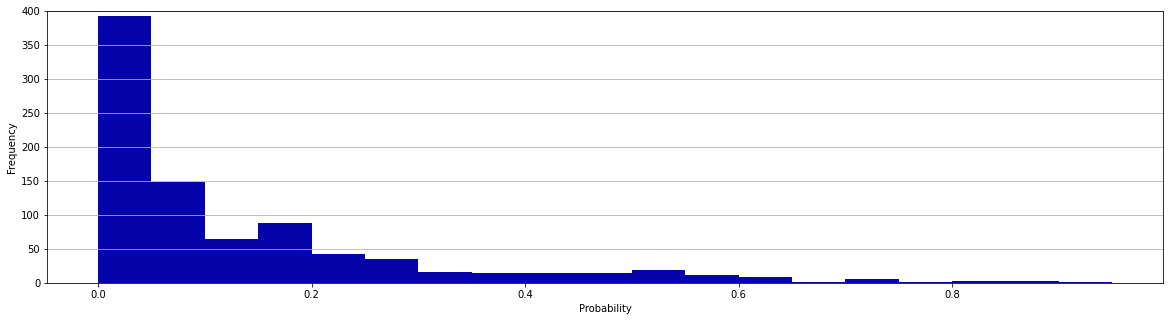

mean=0.14, median=0.06, std=0.16


In [17]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [18]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.4f}, r={:.4f}, f1={:.4f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.3505, r=0.6846, f1=0.4636
at 0.21 threshold, p=0.3574, r=0.6644, f1=0.4648
at 0.22 threshold, p=0.3647, r=0.6510, f1=0.4675
at 0.23 threshold, p=0.3701, r=0.6309, f1=0.4665
at 0.24 threshold, p=0.3704, r=0.6040, f1=0.4592
at 0.25 threshold, p=0.3734, r=0.5839, f1=0.4555
at 0.26 threshold, p=0.3750, r=0.5638, f1=0.4504
at 0.27 threshold, p=0.3709, r=0.5302, f1=0.4365
at 0.28 threshold, p=0.3800, r=0.5101, f1=0.4355
at 0.29 threshold, p=0.3906, r=0.5034, f1=0.4399
at 0.30 threshold, p=0.3934, r=0.4832, f1=0.4337
at 0.31 threshold, p=0.3911, r=0.4698, f1=0.4268
at 0.32 threshold, p=0.3846, r=0.4362, f1=0.4088
at 0.33 threshold, p=0.3789, r=0.4094, f1=0.3935
at 0.34 threshold, p=0.3742, r=0.3893, f1=0.3816
at 0.35 threshold, p=0.3709, r=0.3758, f1=0.3733
at 0.36 threshold, p=0.3681, r=0.3557, f1=0.3618
at 0.37 threshold, p=0.3706, r=0.3557, f1=0.3630
at 0.38 threshold, p=0.3786, r=0.3557, f1=0.3668
at 0.39 threshold, p=0.3824, r=0.3490, f1=0.3649
at 0.40 threshold, p

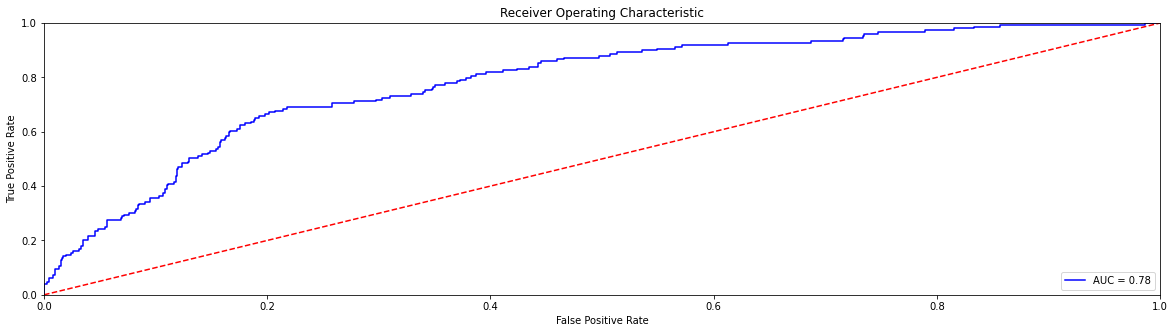

In [19]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

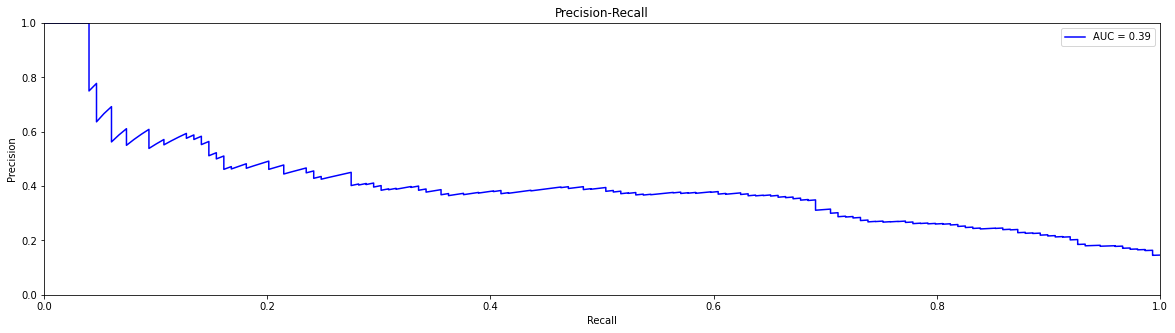

In [20]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine openstack

In [118]:
df = pd.read_csv('../data/openstack_RF_DE_SMOTE_min_df_3_prediction_result.csv').drop(['pred'], axis=1)
df

,Unnamed: 0,prob,actual,test_commit
0,0,0.230000,0,001f865c3cd5f55ddc52c8b68ef49d6b00fe0395
1,1,0.106667,0,0044a90a7409c5b004cc2d0cc56f6afeaf54ccf9
2,2,0.096667,0,006fea117307460544492a3548203a9ef31f34ba
3,3,0.416667,0,00a162c4d42a0f7813058d2ae5c3208b4f7a3157
4,4,0.003333,0,00a4f63f373af0b87c9c4ba8671720bb8324c80a
...,...,...,...,...
1027,1027,0.290000,0,ff6a3dc031d782d01607e28c8bd3fb5aa396bb16
1028,1028,0.346667,1,ff6e64992bf40fd2ac6618cbe50b8844e35b6538
1029,1029,0.330000,0,ff753cd608973f5d72a80aef0f9fb8a646fccc3f
1030,1030,0.723333,0,ff7623f3c9e34a30ebff213fe19c775b1848eb2a


In [119]:
roc_auc_score(df['actual'], df['prob'])

0.7940707016197072

In [120]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

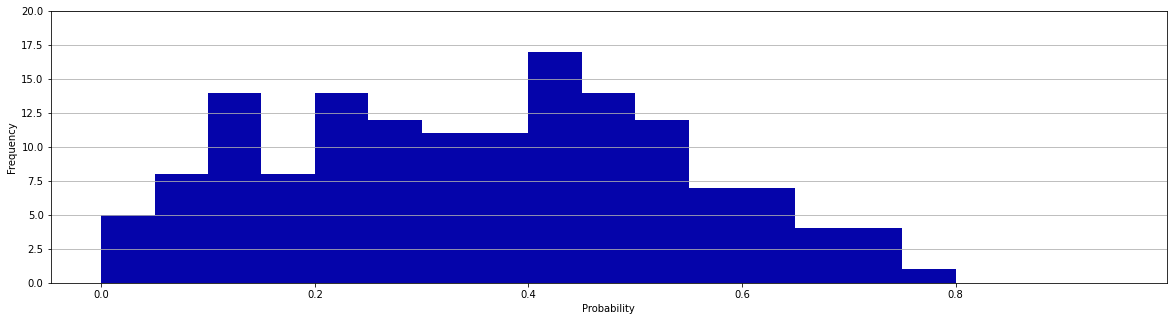

mean=0.35, median=0.36, std=0.19


In [123]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

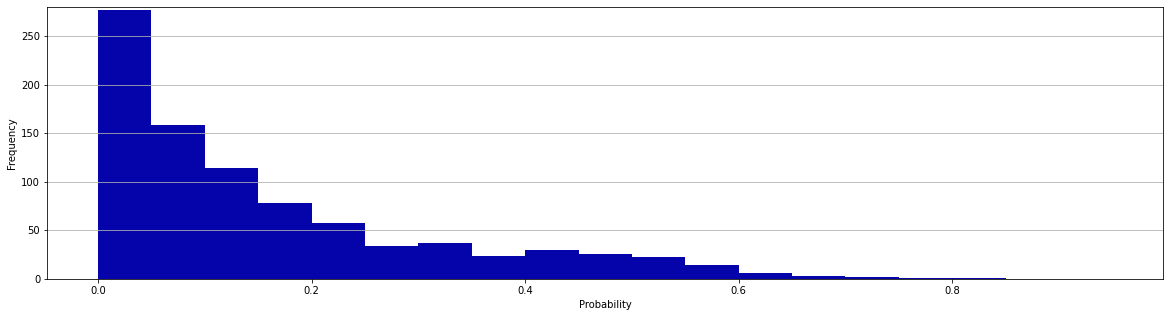

mean=0.16, median=0.10, std=0.16


In [124]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [74]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.31, r=0.77, f1=0.44
at 0.21 threshold, p=0.32, r=0.75, f1=0.45
at 0.22 threshold, p=0.32, r=0.71, f1=0.44
at 0.23 threshold, p=0.32, r=0.70, f1=0.44
at 0.24 threshold, p=0.33, r=0.68, f1=0.45
at 0.25 threshold, p=0.33, r=0.66, f1=0.44
at 0.26 threshold, p=0.33, r=0.65, f1=0.44
at 0.27 threshold, p=0.33, r=0.63, f1=0.43
at 0.28 threshold, p=0.34, r=0.63, f1=0.44
at 0.29 threshold, p=0.34, r=0.60, f1=0.43
at 0.30 threshold, p=0.35, r=0.59, f1=0.44
at 0.31 threshold, p=0.36, r=0.58, f1=0.44
at 0.32 threshold, p=0.36, r=0.56, f1=0.44
at 0.33 threshold, p=0.38, r=0.56, f1=0.45
at 0.34 threshold, p=0.38, r=0.54, f1=0.44
at 0.35 threshold, p=0.38, r=0.52, f1=0.44
at 0.36 threshold, p=0.37, r=0.50, f1=0.43
at 0.37 threshold, p=0.38, r=0.48, f1=0.42
at 0.38 threshold, p=0.38, r=0.46, f1=0.42
at 0.39 threshold, p=0.38, r=0.45, f1=0.41
at 0.40 threshold, p=0.38, r=0.42, f1=0.40
at 0.41 threshold, p=0.39, r=0.41, f1=0.40
at 0.42 threshold, p=0.39, r=0.38, f1=0.38
at 0.43 thr

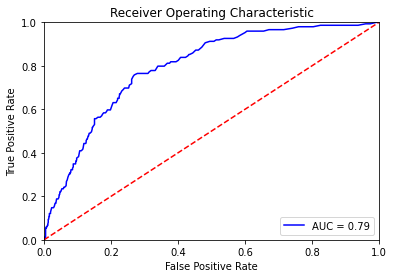

In [77]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

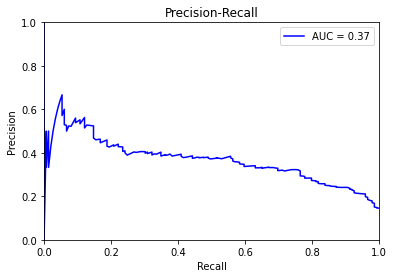

In [78]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine openstack (original metrics)

In [24]:
df = pd.read_csv('../data/openstack_all_smote_allmetrics_original_result.csv').drop(['pred'], axis=1)
df

,Unnamed: 0,prob,actual,test_commit
0,0,0.273333,0,001f865c3cd5f55ddc52c8b68ef49d6b00fe0395
1,1,0.156667,0,0044a90a7409c5b004cc2d0cc56f6afeaf54ccf9
2,2,0.126667,0,006fea117307460544492a3548203a9ef31f34ba
3,3,0.473333,0,00a162c4d42a0f7813058d2ae5c3208b4f7a3157
4,4,0.003333,0,00a4f63f373af0b87c9c4ba8671720bb8324c80a
...,...,...,...,...
1027,1027,0.290000,0,ff6a3dc031d782d01607e28c8bd3fb5aa396bb16
1028,1028,0.313333,1,ff6e64992bf40fd2ac6618cbe50b8844e35b6538
1029,1029,0.356667,0,ff753cd608973f5d72a80aef0f9fb8a646fccc3f
1030,1030,0.733333,0,ff7623f3c9e34a30ebff213fe19c775b1848eb2a


In [25]:
roc_auc_score(df['actual'], df['prob'])

0.7890542461255482

In [26]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

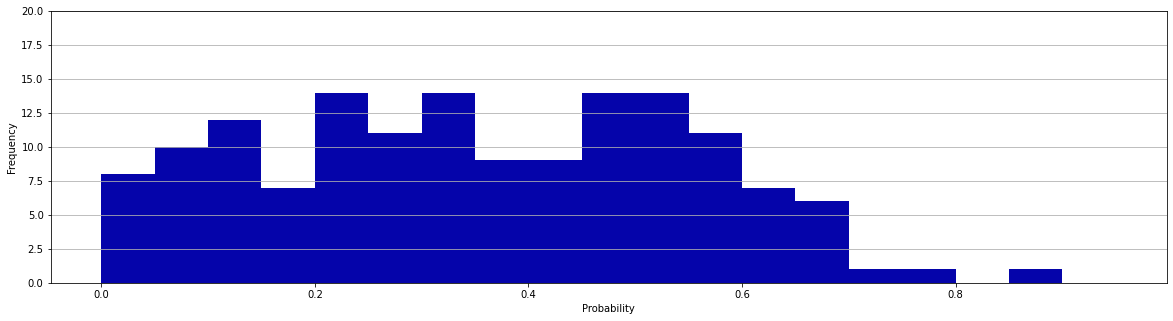

mean=0.36, median=0.35, std=0.20


In [27]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

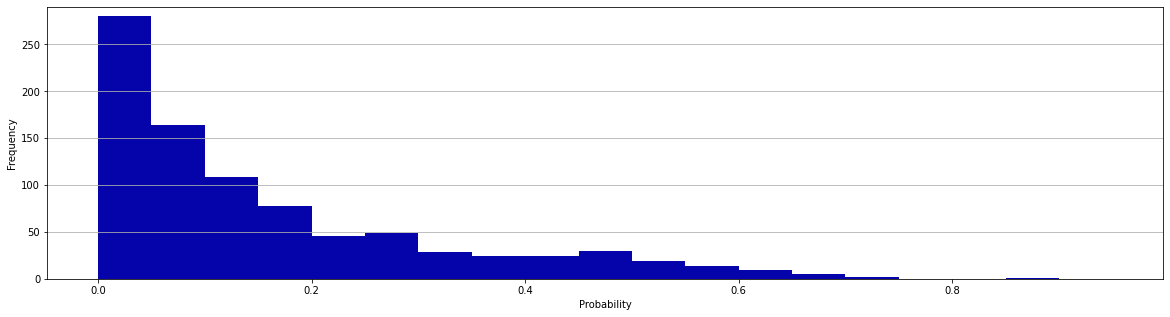

mean=0.16, median=0.10, std=0.16


In [28]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [30]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.4f}, r={:.4f}, f1={:.4f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.3077, r=0.7517, f1=0.4366
at 0.21 threshold, p=0.3132, r=0.7315, f1=0.4386
at 0.22 threshold, p=0.3166, r=0.7181, f1=0.4394
at 0.23 threshold, p=0.3200, r=0.6980, f1=0.4388
at 0.24 threshold, p=0.3237, r=0.6779, f1=0.4382
at 0.25 threshold, p=0.3200, r=0.6443, f1=0.4276
at 0.26 threshold, p=0.3242, r=0.6376, f1=0.4299
at 0.27 threshold, p=0.3226, r=0.6040, f1=0.4206
at 0.28 threshold, p=0.3346, r=0.6040, f1=0.4306
at 0.29 threshold, p=0.3490, r=0.5973, f1=0.4406
at 0.30 threshold, p=0.3566, r=0.5839, f1=0.4427
at 0.31 threshold, p=0.3644, r=0.5772, f1=0.4468
at 0.32 threshold, p=0.3656, r=0.5570, f1=0.4415
at 0.33 threshold, p=0.3761, r=0.5503, f1=0.4469
at 0.34 threshold, p=0.3709, r=0.5302, f1=0.4365
at 0.35 threshold, p=0.3632, r=0.4899, f1=0.4171
at 0.36 threshold, p=0.3797, r=0.4765, f1=0.4226
at 0.37 threshold, p=0.3817, r=0.4765, f1=0.4239
at 0.38 threshold, p=0.3889, r=0.4698, f1=0.4255
at 0.39 threshold, p=0.3837, r=0.4430, f1=0.4112
at 0.40 threshold, p

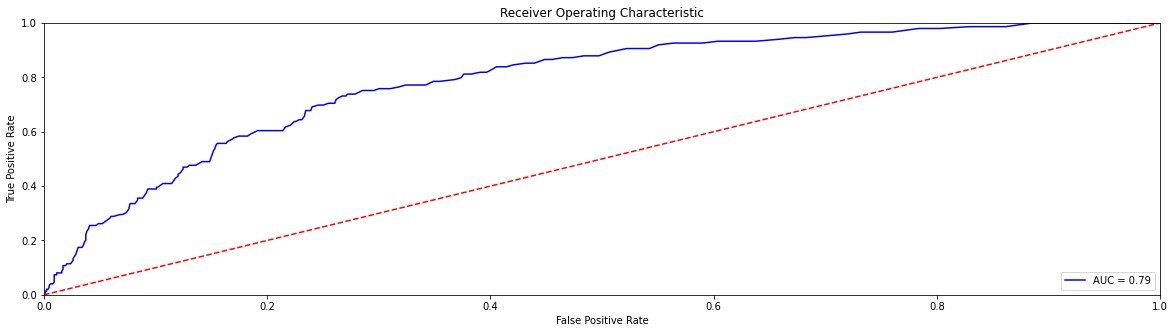

In [31]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

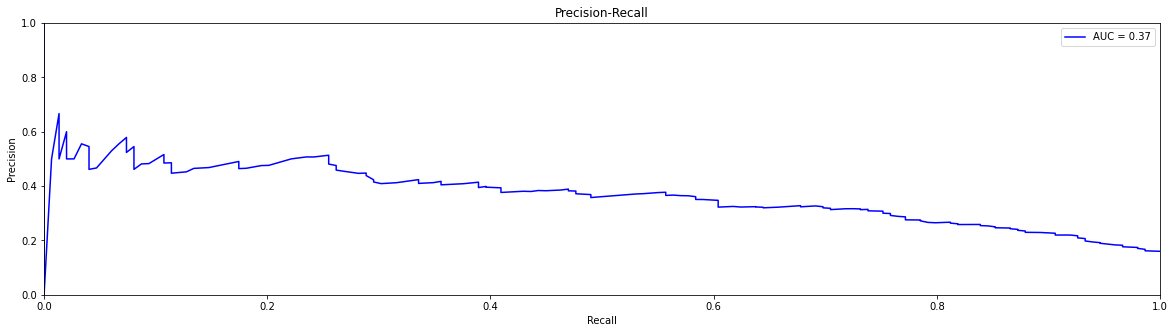

In [32]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine openstack (kamei metrics)

In [33]:
df = pd.read_csv('../data/openstack_all_smote_allmetrics_kamei_result.csv').drop(['pred'], axis=1)
df

,Unnamed: 0,prob,actual,test_commit
0,0,0.263333,0,001f865c3cd5f55ddc52c8b68ef49d6b00fe0395
1,1,0.160000,0,0044a90a7409c5b004cc2d0cc56f6afeaf54ccf9
2,2,0.160000,0,006fea117307460544492a3548203a9ef31f34ba
3,3,0.416667,0,00a162c4d42a0f7813058d2ae5c3208b4f7a3157
4,4,0.006667,0,00a4f63f373af0b87c9c4ba8671720bb8324c80a
...,...,...,...,...
1027,1027,0.300000,0,ff6a3dc031d782d01607e28c8bd3fb5aa396bb16
1028,1028,0.303333,1,ff6e64992bf40fd2ac6618cbe50b8844e35b6538
1029,1029,0.430000,0,ff753cd608973f5d72a80aef0f9fb8a646fccc3f
1030,1030,0.783333,0,ff7623f3c9e34a30ebff213fe19c775b1848eb2a


In [34]:
roc_auc_score(df['actual'], df['prob'])

0.7976316249515457

In [35]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

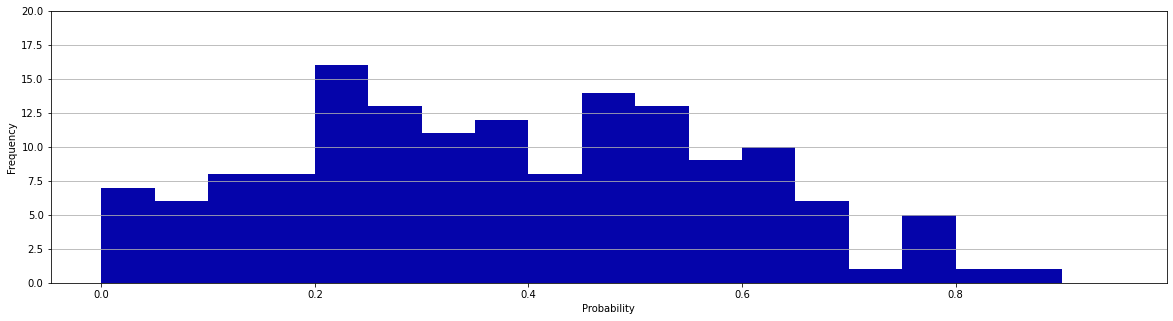

mean=0.38, median=0.38, std=0.20


In [36]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

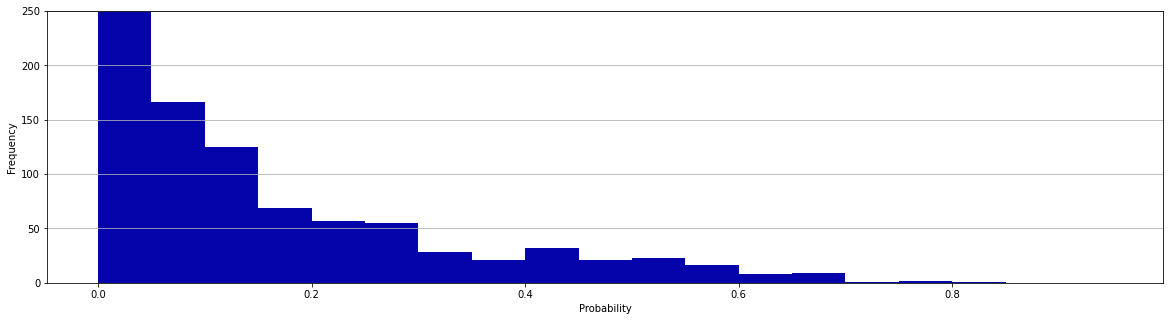

mean=0.17, median=0.11, std=0.17


In [37]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [38]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.4f}, r={:.4f}, f1={:.4f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.3046, r=0.8054, f1=0.4420
at 0.21 threshold, p=0.3120, r=0.7852, f1=0.4466
at 0.22 threshold, p=0.3132, r=0.7651, f1=0.4444
at 0.23 threshold, p=0.3169, r=0.7315, f1=0.4422
at 0.24 threshold, p=0.3193, r=0.7114, f1=0.4407
at 0.25 threshold, p=0.3259, r=0.6913, f1=0.4430
at 0.26 threshold, p=0.3233, r=0.6510, f1=0.4321
at 0.27 threshold, p=0.3322, r=0.6376, f1=0.4368
at 0.28 threshold, p=0.3370, r=0.6242, f1=0.4376
at 0.29 threshold, p=0.3420, r=0.6174, f1=0.4402
at 0.30 threshold, p=0.3597, r=0.6107, f1=0.4527
at 0.31 threshold, p=0.3577, r=0.5906, f1=0.4456
at 0.32 threshold, p=0.3580, r=0.5839, f1=0.4439
at 0.33 threshold, p=0.3598, r=0.5772, f1=0.4433
at 0.34 threshold, p=0.3673, r=0.5570, f1=0.4427
at 0.35 threshold, p=0.3738, r=0.5369, f1=0.4408
at 0.36 threshold, p=0.3756, r=0.5168, f1=0.4350
at 0.37 threshold, p=0.3831, r=0.5168, f1=0.4400
at 0.38 threshold, p=0.3744, r=0.4899, f1=0.4244
at 0.39 threshold, p=0.3763, r=0.4698, f1=0.4179
at 0.40 threshold, p

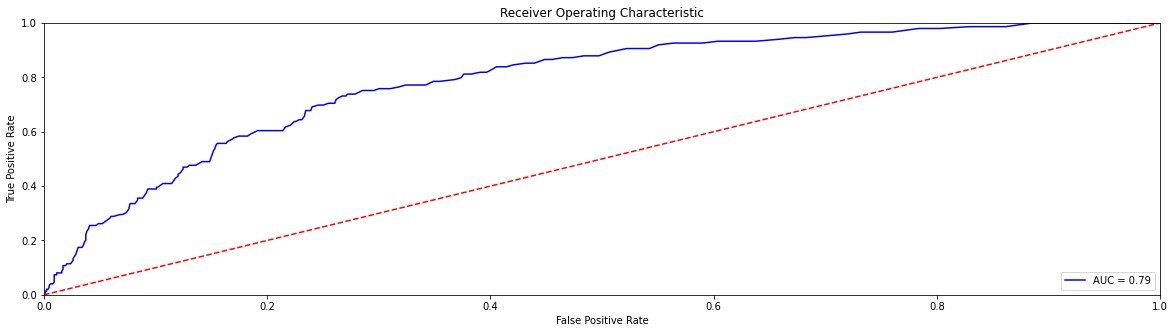

In [31]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

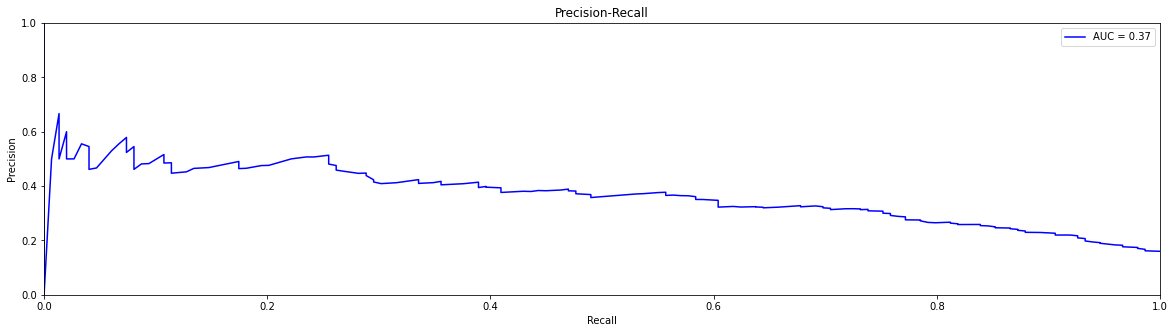

In [32]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance spacial tokens

In [3]:
df = pd.read_csv('../data/test_result_18.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.422226
1,1,0,0.798243
2,2,0,0.273409
3,3,0,0.574566
4,4,0,0.294470
...,...,...,...
6456,6456,0,0.272401
6457,6457,0,0.335241
6458,6458,0,0.074335
6459,6459,0,0.161513


In [4]:
roc_auc_score(df['y_true'], df['y_score'])

0.7903112990671977

In [5]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

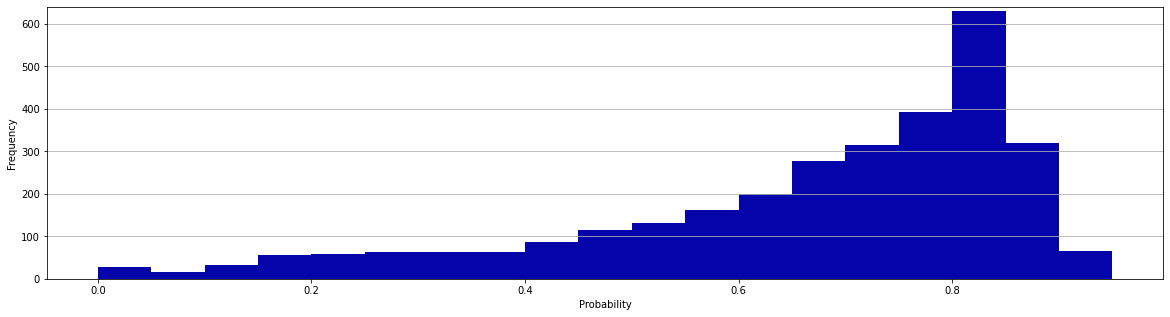

mean=0.67, median=0.73, std=0.20


In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

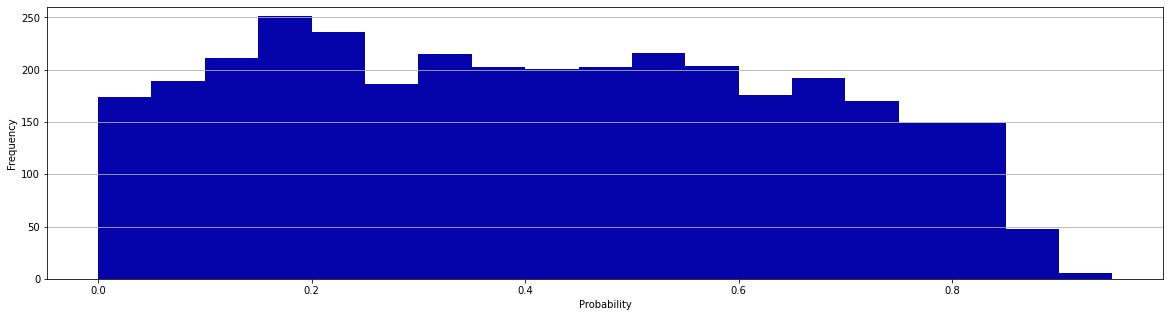

mean=0.41, median=0.41, std=0.24


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [9]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.54, r=0.96, f1=0.69
at 0.21 threshold, p=0.54, r=0.95, f1=0.69
at 0.22 threshold, p=0.54, r=0.95, f1=0.69
at 0.23 threshold, p=0.55, r=0.95, f1=0.69
at 0.24 threshold, p=0.55, r=0.94, f1=0.69
at 0.25 threshold, p=0.56, r=0.94, f1=0.70
at 0.26 threshold, p=0.56, r=0.94, f1=0.70
at 0.27 threshold, p=0.56, r=0.93, f1=0.70
at 0.28 threshold, p=0.57, r=0.93, f1=0.70
at 0.29 threshold, p=0.57, r=0.93, f1=0.70
at 0.30 threshold, p=0.57, r=0.92, f1=0.70
at 0.31 threshold, p=0.57, r=0.91, f1=0.71
at 0.32 threshold, p=0.58, r=0.91, f1=0.71
at 0.33 threshold, p=0.58, r=0.91, f1=0.71
at 0.34 threshold, p=0.59, r=0.90, f1=0.71
at 0.35 threshold, p=0.59, r=0.90, f1=0.71
at 0.36 threshold, p=0.59, r=0.89, f1=0.71
at 0.37 threshold, p=0.60, r=0.89, f1=0.72
at 0.38 threshold, p=0.60, r=0.89, f1=0.72
at 0.39 threshold, p=0.61, r=0.88, f1=0.72
at 0.40 threshold, p=0.61, r=0.88, f1=0.72
at 0.41 threshold, p=0.62, r=0.87, f1=0.72
at 0.42 threshold, p=0.62, r=0.87, f1=0.72
at 0.43 thr

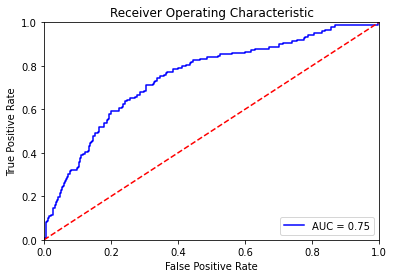

In [66]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

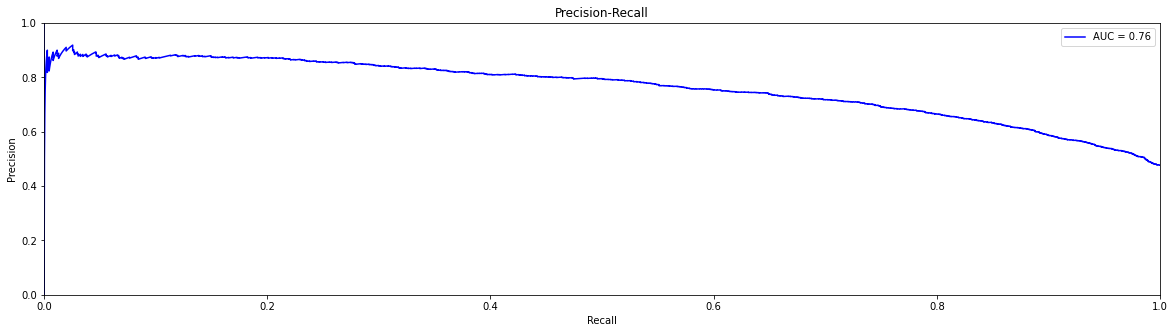

In [10]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance all tokens

In [13]:
df = pd.read_csv('../data/test_result_19b.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.090050
1,1,0,0.846784
2,2,0,0.319196
3,3,0,0.112762
4,4,0,0.180916
...,...,...,...
6441,6441,0,0.088569
6442,6442,0,0.271966
6443,6443,0,0.386756
6444,6444,0,0.293662


In [14]:
roc_auc_score(df['y_true'], df['y_score'])

0.8261636476688257

In [15]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

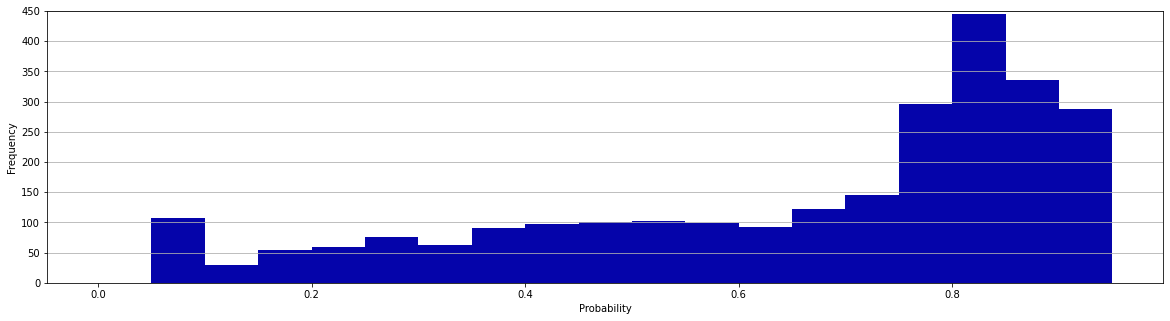

mean=0.71, median=0.80, std=0.26


In [16]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

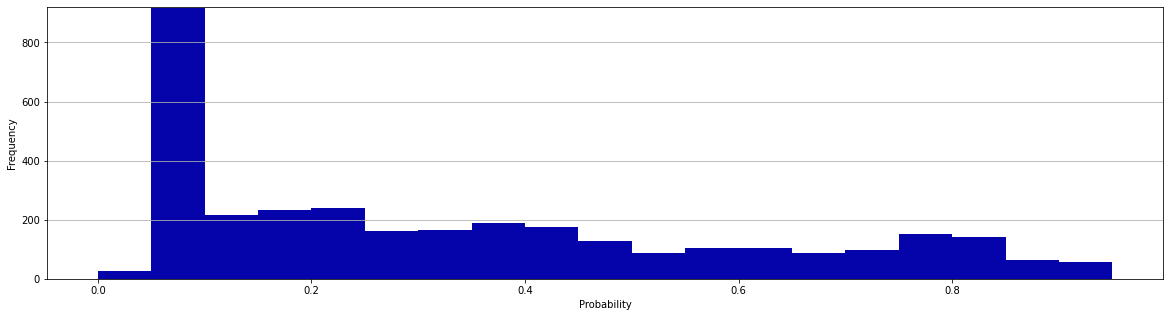

mean=0.35, median=0.27, std=0.27


In [17]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [18]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.59, r=0.94, f1=0.73
at 0.21 threshold, p=0.60, r=0.93, f1=0.73
at 0.22 threshold, p=0.60, r=0.93, f1=0.73
at 0.23 threshold, p=0.61, r=0.92, f1=0.73
at 0.24 threshold, p=0.61, r=0.92, f1=0.73
at 0.25 threshold, p=0.62, r=0.92, f1=0.74
at 0.26 threshold, p=0.62, r=0.91, f1=0.74
at 0.27 threshold, p=0.62, r=0.91, f1=0.74
at 0.28 threshold, p=0.63, r=0.90, f1=0.74
at 0.29 threshold, p=0.63, r=0.90, f1=0.74
at 0.30 threshold, p=0.63, r=0.89, f1=0.74
at 0.31 threshold, p=0.64, r=0.89, f1=0.74
at 0.32 threshold, p=0.64, r=0.88, f1=0.74
at 0.33 threshold, p=0.64, r=0.88, f1=0.74
at 0.34 threshold, p=0.65, r=0.88, f1=0.75
at 0.35 threshold, p=0.65, r=0.87, f1=0.75
at 0.36 threshold, p=0.66, r=0.87, f1=0.75
at 0.37 threshold, p=0.66, r=0.86, f1=0.75
at 0.38 threshold, p=0.67, r=0.85, f1=0.75
at 0.39 threshold, p=0.67, r=0.85, f1=0.75
at 0.40 threshold, p=0.68, r=0.84, f1=0.75
at 0.41 threshold, p=0.68, r=0.84, f1=0.75
at 0.42 threshold, p=0.68, r=0.83, f1=0.75
at 0.43 thr

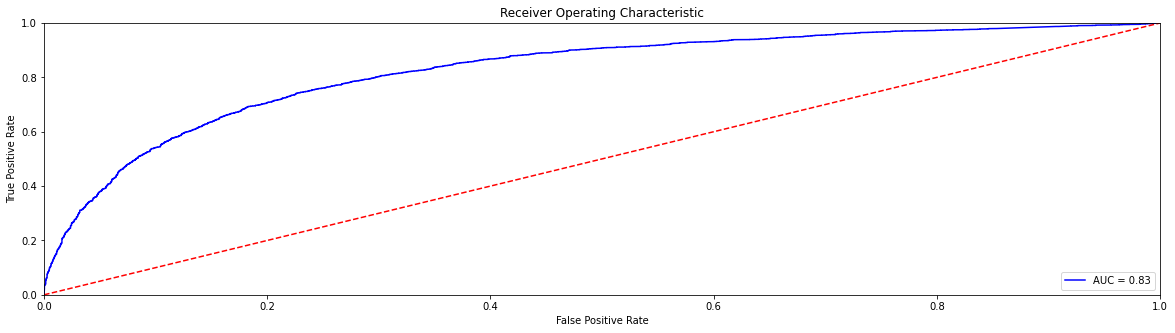

In [9]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

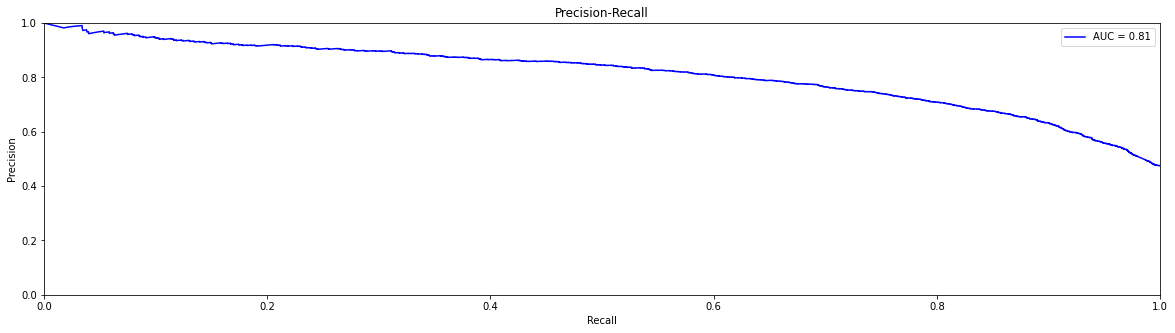

In [10]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance all tokens + some metrics

In [13]:
df = pd.read_csv('../data/test_result_27.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.143780
1,1,0,0.852712
2,2,0,0.142260
3,3,0,0.154267
4,4,0,0.118027
...,...,...,...
6412,6412,0,0.022717
6413,6413,0,0.210178
6414,6414,0,0.369996
6415,6415,0,0.346939


In [14]:
df = pd.concat([df[df['y_true'] == 1].sample(frac=0.15), df[df['y_true'] == 0]])
df

,Unnamed: 0,y_true,y_score
1940,1940,1,0.677068
2493,2493,1,0.862098
5395,5395,1,0.718553
2585,2585,1,0.917260
2525,2525,1,0.863335
...,...,...,...
6412,6412,0,0.022717
6413,6413,0,0.210178
6414,6414,0,0.369996
6415,6415,0,0.346939


In [15]:
df = df.sample(frac=1)

In [16]:
roc_auc_score(df['y_true'], df['y_score'])

0.8559541910331385

In [17]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

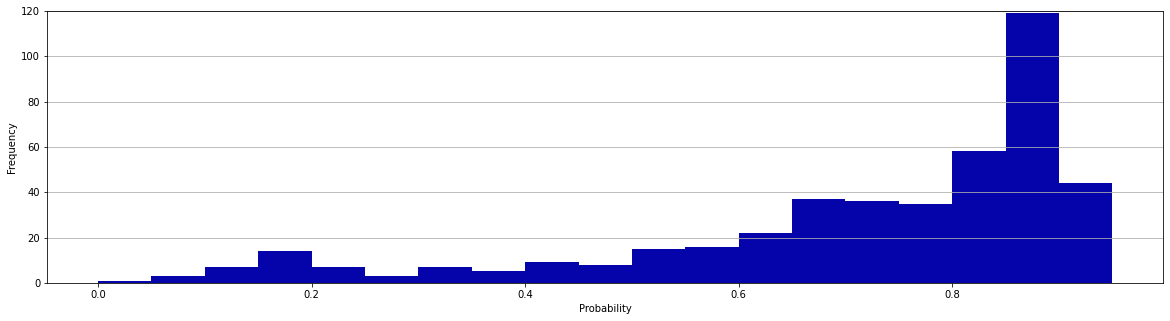

mean=0.72, median=0.80, std=0.21


In [18]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

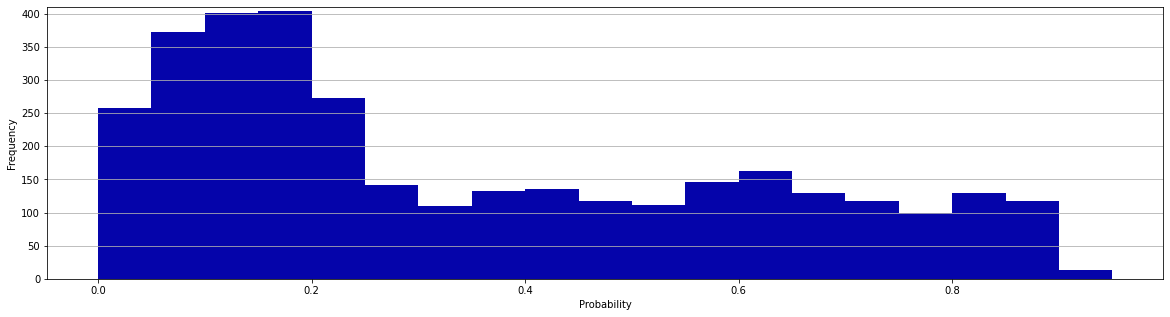

mean=0.35, median=0.24, std=0.26


In [19]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [20]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.18, r=0.95, f1=0.30
at 0.21 threshold, p=0.19, r=0.94, f1=0.31
at 0.22 threshold, p=0.19, r=0.94, f1=0.32
at 0.23 threshold, p=0.20, r=0.93, f1=0.32
at 0.24 threshold, p=0.20, r=0.93, f1=0.33
at 0.25 threshold, p=0.20, r=0.93, f1=0.33
at 0.26 threshold, p=0.21, r=0.93, f1=0.34
at 0.27 threshold, p=0.21, r=0.93, f1=0.34
at 0.28 threshold, p=0.21, r=0.93, f1=0.34
at 0.29 threshold, p=0.21, r=0.93, f1=0.35
at 0.30 threshold, p=0.22, r=0.92, f1=0.35
at 0.31 threshold, p=0.22, r=0.92, f1=0.35
at 0.32 threshold, p=0.22, r=0.91, f1=0.35
at 0.33 threshold, p=0.22, r=0.91, f1=0.36
at 0.34 threshold, p=0.22, r=0.91, f1=0.36
at 0.35 threshold, p=0.23, r=0.91, f1=0.36
at 0.36 threshold, p=0.23, r=0.91, f1=0.37
at 0.37 threshold, p=0.23, r=0.91, f1=0.37
at 0.38 threshold, p=0.24, r=0.90, f1=0.37
at 0.39 threshold, p=0.24, r=0.90, f1=0.38
at 0.40 threshold, p=0.24, r=0.90, f1=0.38
at 0.41 threshold, p=0.24, r=0.89, f1=0.38
at 0.42 threshold, p=0.25, r=0.89, f1=0.39
at 0.43 thr

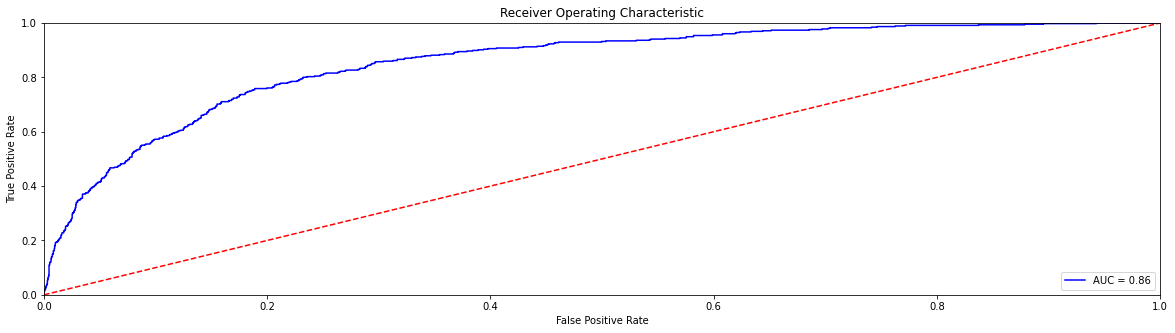

In [21]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

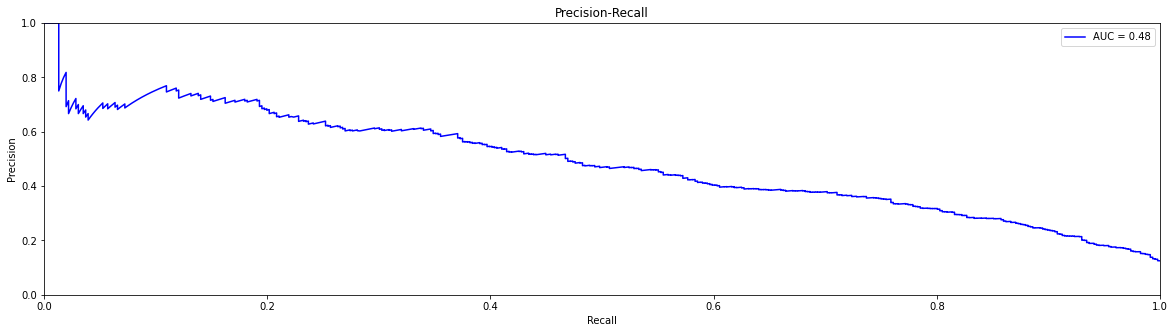

In [22]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance all tokens + all metrics

In [39]:
df = pd.read_csv('../data/test_result_27b.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.135529
1,1,0,0.915446
2,2,0,0.135098
3,3,0,0.222863
4,4,0,0.264922
...,...,...,...
6399,6399,0,0.100803
6400,6400,0,0.118564
6401,6401,0,0.255081
6402,6402,0,0.219868


In [40]:
roc_auc_score(df['y_true'], df['y_score'])

0.8338689750334594

In [41]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

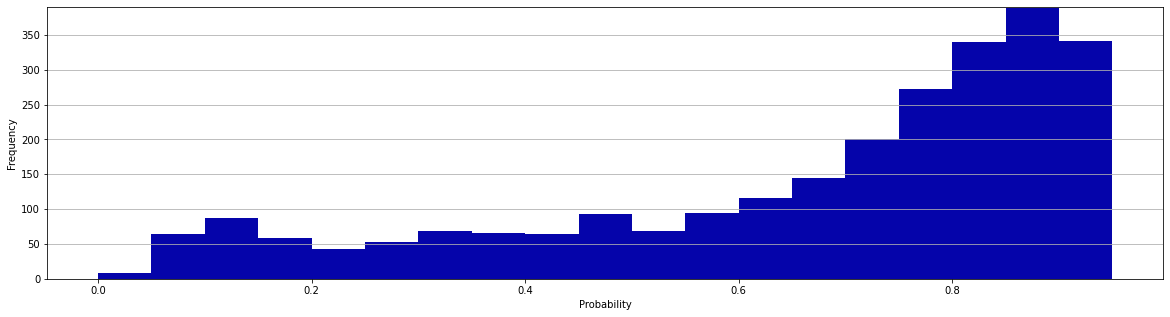

mean=0.72, median=0.80, std=0.25


In [42]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

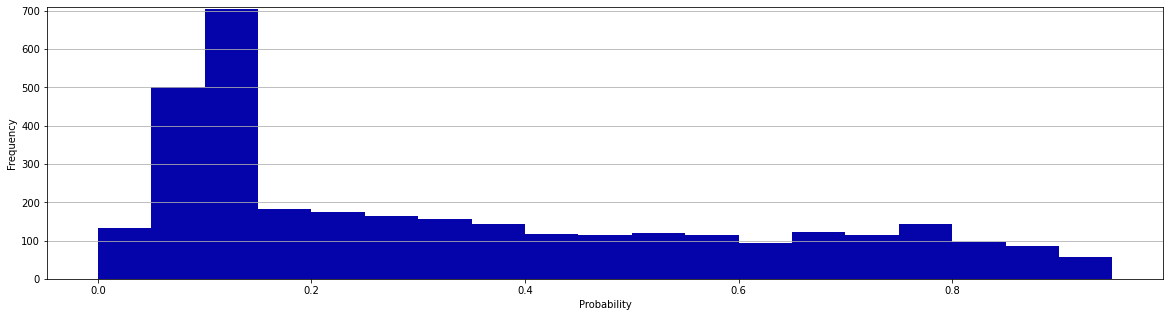

mean=0.34, median=0.25, std=0.27


In [43]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [44]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.60, r=0.93, f1=0.73
at 0.21 threshold, p=0.61, r=0.93, f1=0.73
at 0.22 threshold, p=0.61, r=0.92, f1=0.73
at 0.23 threshold, p=0.61, r=0.92, f1=0.74
at 0.24 threshold, p=0.62, r=0.92, f1=0.74
at 0.25 threshold, p=0.62, r=0.91, f1=0.74
at 0.26 threshold, p=0.63, r=0.91, f1=0.74
at 0.27 threshold, p=0.63, r=0.91, f1=0.74
at 0.28 threshold, p=0.63, r=0.90, f1=0.75
at 0.29 threshold, p=0.64, r=0.90, f1=0.75
at 0.30 threshold, p=0.64, r=0.90, f1=0.75
at 0.31 threshold, p=0.65, r=0.89, f1=0.75
at 0.32 threshold, p=0.65, r=0.89, f1=0.75
at 0.33 threshold, p=0.65, r=0.88, f1=0.75
at 0.34 threshold, p=0.66, r=0.88, f1=0.75
at 0.35 threshold, p=0.66, r=0.87, f1=0.75
at 0.36 threshold, p=0.66, r=0.87, f1=0.75
at 0.37 threshold, p=0.67, r=0.87, f1=0.75
at 0.38 threshold, p=0.67, r=0.86, f1=0.76
at 0.39 threshold, p=0.68, r=0.86, f1=0.76
at 0.40 threshold, p=0.68, r=0.85, f1=0.76
at 0.41 threshold, p=0.68, r=0.85, f1=0.76
at 0.42 threshold, p=0.68, r=0.84, f1=0.76
at 0.43 thr

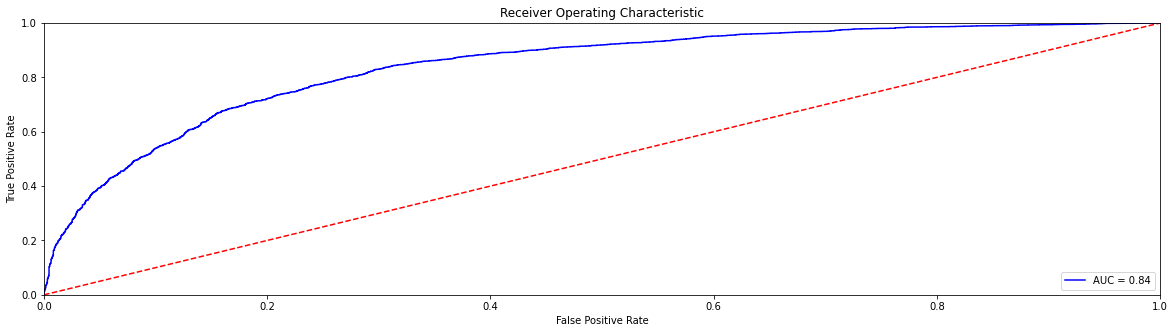

In [16]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

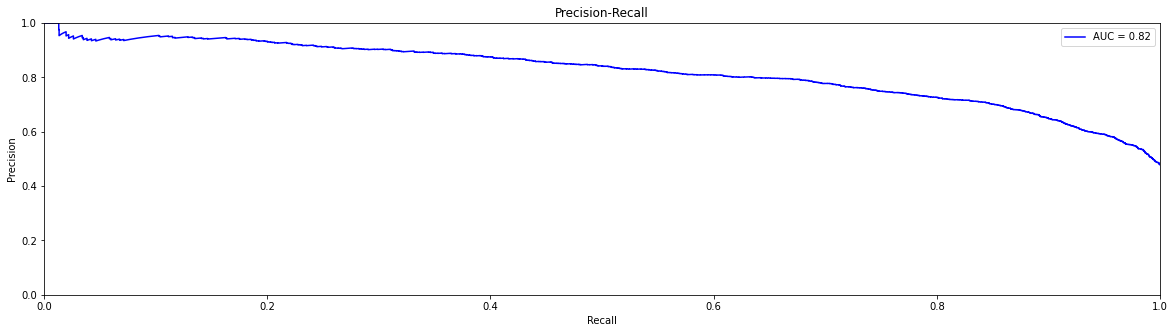

In [17]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache unbalance spacial tokens

In [3]:
df = pd.read_csv('../data/test_result_20.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,7.236878e-13
1,1,0,4.031732e-10
2,2,0,5.352125e-12
3,3,0,4.818599e-11
4,4,0,1.383762e-15
...,...,...,...
6456,6456,0,7.015243e-16
6457,6457,0,5.209852e-10
6458,6458,0,3.894311e-10
6459,6459,0,1.521096e-09


In [4]:
roc_auc_score(df['y_true'], df['y_score'])

0.6546353965610949

In [5]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

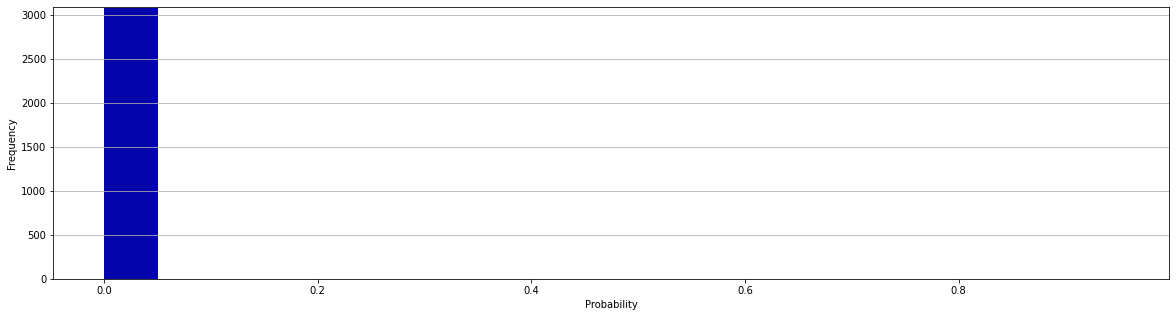

mean=0.00, median=0.00, std=0.00


In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

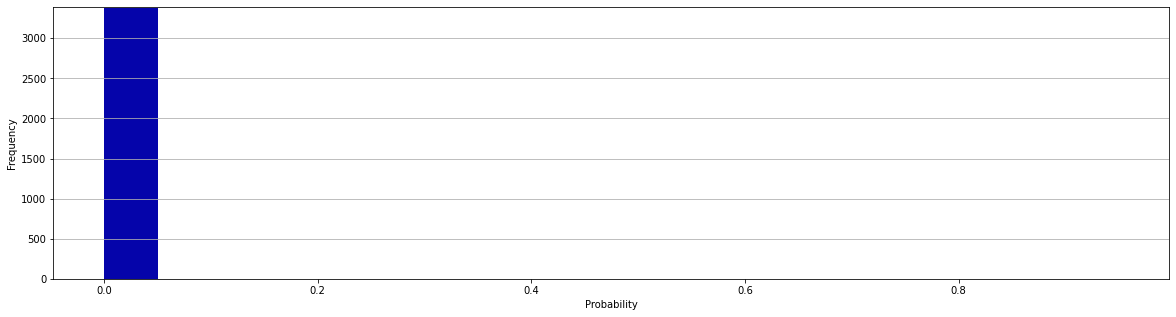

mean=0.00, median=0.00, std=0.00


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [8]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anacond

at 0.20 threshold, p=0.00, r=0.00, f1=0.00
at 0.21 threshold, p=0.00, r=0.00, f1=0.00
at 0.22 threshold, p=0.00, r=0.00, f1=0.00
at 0.23 threshold, p=0.00, r=0.00, f1=0.00
at 0.24 threshold, p=0.00, r=0.00, f1=0.00
at 0.25 threshold, p=0.00, r=0.00, f1=0.00
at 0.26 threshold, p=0.00, r=0.00, f1=0.00
at 0.27 threshold, p=0.00, r=0.00, f1=0.00
at 0.28 threshold, p=0.00, r=0.00, f1=0.00
at 0.29 threshold, p=0.00, r=0.00, f1=0.00
at 0.30 threshold, p=0.00, r=0.00, f1=0.00
at 0.31 threshold, p=0.00, r=0.00, f1=0.00
at 0.32 threshold, p=0.00, r=0.00, f1=0.00
at 0.33 threshold, p=0.00, r=0.00, f1=0.00
at 0.34 threshold, p=0.00, r=0.00, f1=0.00
at 0.35 threshold, p=0.00, r=0.00, f1=0.00
at 0.36 threshold, p=0.00, r=0.00, f1=0.00
at 0.37 threshold, p=0.00, r=0.00, f1=0.00
at 0.38 threshold, p=0.00, r=0.00, f1=0.00
at 0.39 threshold, p=0.00, r=0.00, f1=0.00
at 0.40 threshold, p=0.00, r=0.00, f1=0.00
at 0.41 threshold, p=0.00, r=0.00, f1=0.00
at 0.42 threshold, p=0.00, r=0.00, f1=0.00
at 0.43 thr

/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


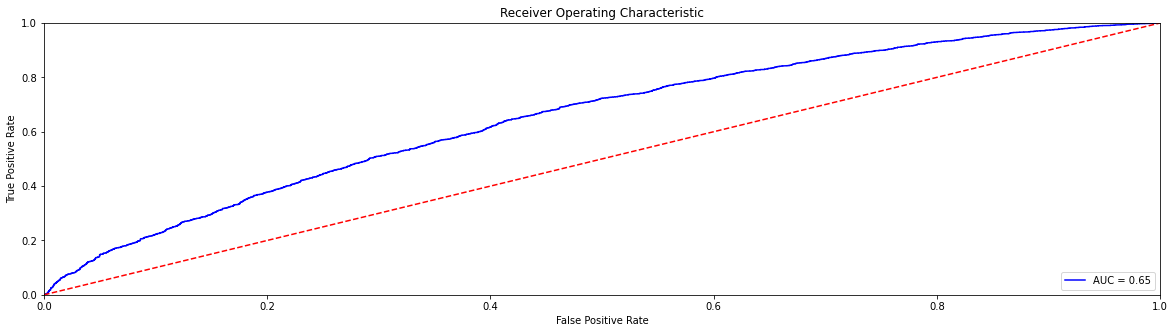

In [9]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

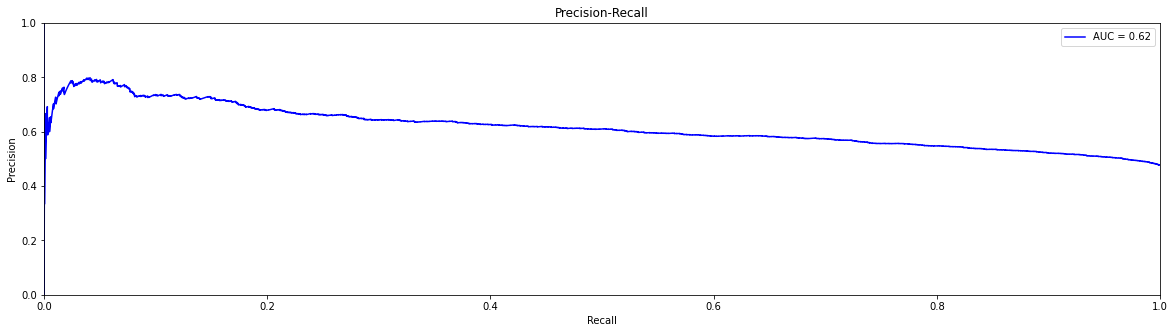

In [10]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN cross-lingual spacial tokens

In [11]:
df = pd.read_csv('../data/test_result_21.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.373526
1,1,0,0.313082
2,2,0,0.236330
3,3,0,0.163923
4,4,0,0.124792
...,...,...,...
1027,1027,0,0.399147
1028,1028,0,0.377693
1029,1029,0,0.417976
1030,1030,0,0.314656


In [12]:
roc_auc_score(df['y_true'], df['y_score'])

0.6437100488724377

In [13]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

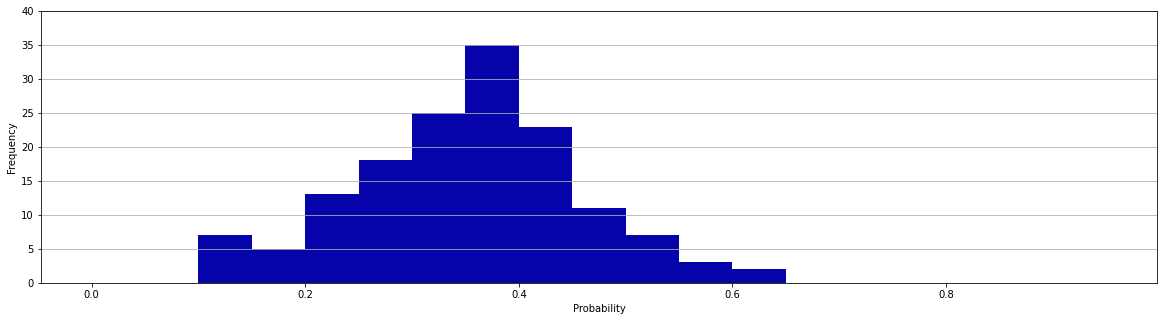

mean=0.35, median=0.36, std=0.11


In [14]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

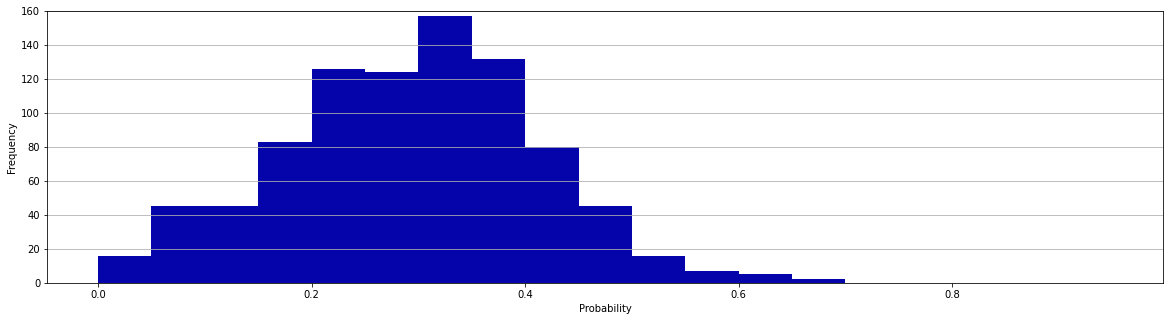

mean=0.29, median=0.30, std=0.12


In [15]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [16]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.16, r=0.92, f1=0.28
at 0.21 threshold, p=0.17, r=0.90, f1=0.28
at 0.22 threshold, p=0.17, r=0.88, f1=0.29
at 0.23 threshold, p=0.17, r=0.87, f1=0.29
at 0.24 threshold, p=0.18, r=0.85, f1=0.29
at 0.25 threshold, p=0.18, r=0.83, f1=0.29
at 0.26 threshold, p=0.18, r=0.81, f1=0.30
at 0.27 threshold, p=0.19, r=0.80, f1=0.31
at 0.28 threshold, p=0.19, r=0.77, f1=0.30
at 0.29 threshold, p=0.19, r=0.73, f1=0.30
at 0.30 threshold, p=0.19, r=0.71, f1=0.30
at 0.31 threshold, p=0.20, r=0.68, f1=0.30
at 0.32 threshold, p=0.20, r=0.64, f1=0.30
at 0.33 threshold, p=0.21, r=0.61, f1=0.31
at 0.34 threshold, p=0.21, r=0.56, f1=0.30
at 0.35 threshold, p=0.22, r=0.54, f1=0.31
at 0.36 threshold, p=0.23, r=0.52, f1=0.32
at 0.37 threshold, p=0.23, r=0.48, f1=0.31
at 0.38 threshold, p=0.22, r=0.40, f1=0.28
at 0.39 threshold, p=0.22, r=0.36, f1=0.27
at 0.40 threshold, p=0.23, r=0.31, f1=0.26
at 0.41 threshold, p=0.23, r=0.28, f1=0.25
at 0.42 threshold, p=0.24, r=0.25, f1=0.24
at 0.43 thr

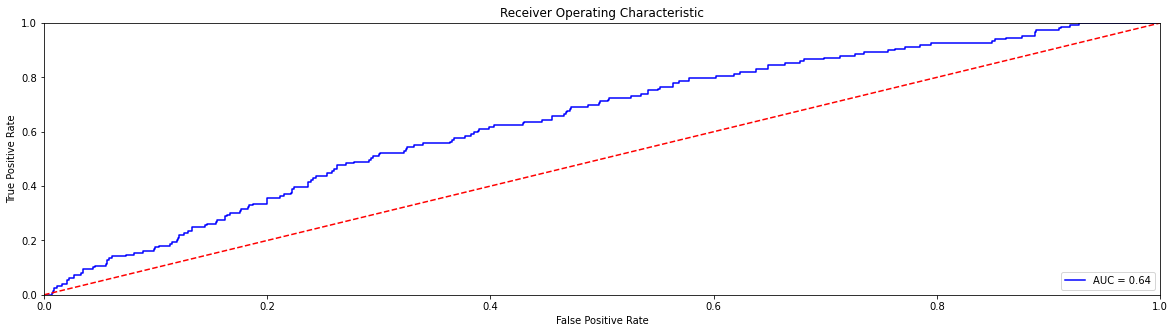

In [17]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

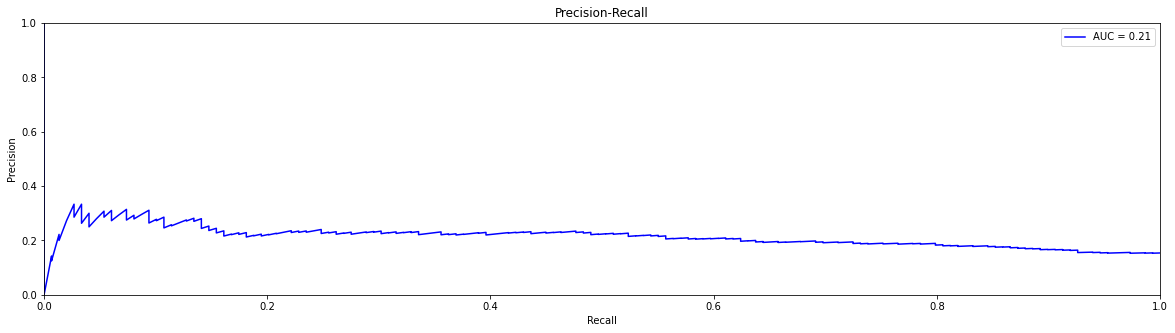

In [18]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance spacial tokens (agg: attention + concat)

In [13]:
df = pd.read_csv('../data/test_result_23.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.370984
1,1,0,0.830889
2,2,0,0.310573
3,3,0,0.678686
4,4,0,0.337430
...,...,...,...
6456,6456,0,0.306363
6457,6457,0,0.422174
6458,6458,0,0.333017
6459,6459,0,0.315005


In [14]:
roc_auc_score(df['y_true'], df['y_score'])

0.799812219962396

In [15]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

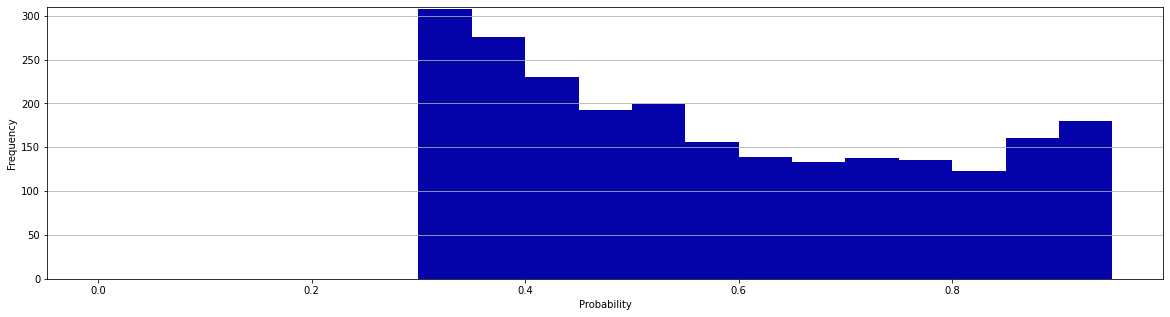

mean=0.67, median=0.66, std=0.24


In [16]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

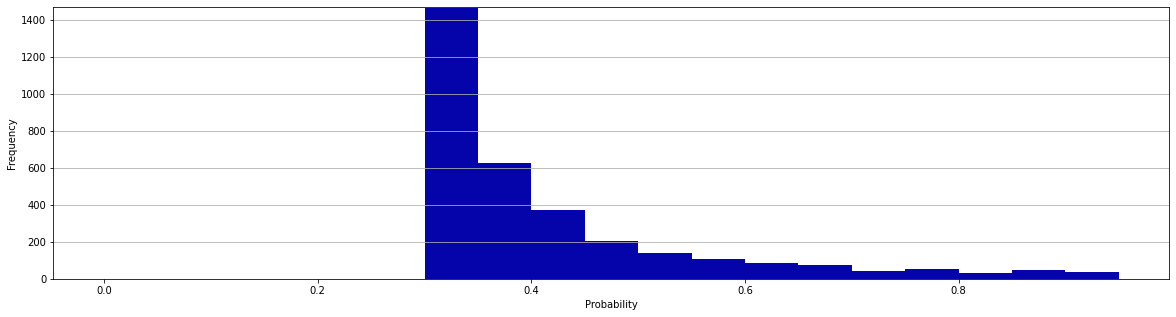

mean=0.43, median=0.36, std=0.17


In [17]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [18]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.48, r=1.00, f1=0.65
at 0.21 threshold, p=0.48, r=1.00, f1=0.65
at 0.22 threshold, p=0.48, r=1.00, f1=0.65
at 0.23 threshold, p=0.48, r=1.00, f1=0.65
at 0.24 threshold, p=0.48, r=1.00, f1=0.65
at 0.25 threshold, p=0.48, r=1.00, f1=0.65
at 0.26 threshold, p=0.48, r=1.00, f1=0.65
at 0.27 threshold, p=0.48, r=1.00, f1=0.65
at 0.28 threshold, p=0.48, r=1.00, f1=0.65
at 0.29 threshold, p=0.48, r=1.00, f1=0.65
at 0.30 threshold, p=0.48, r=1.00, f1=0.65
at 0.31 threshold, p=0.51, r=0.98, f1=0.67
at 0.32 threshold, p=0.53, r=0.96, f1=0.69
at 0.33 threshold, p=0.55, r=0.94, f1=0.70
at 0.34 threshold, p=0.57, r=0.92, f1=0.71
at 0.35 threshold, p=0.59, r=0.90, f1=0.71
at 0.36 threshold, p=0.61, r=0.89, f1=0.72
at 0.37 threshold, p=0.62, r=0.86, f1=0.72
at 0.38 threshold, p=0.64, r=0.85, f1=0.73
at 0.39 threshold, p=0.65, r=0.83, f1=0.73
at 0.40 threshold, p=0.66, r=0.81, f1=0.73
at 0.41 threshold, p=0.67, r=0.80, f1=0.73
at 0.42 threshold, p=0.69, r=0.79, f1=0.73
at 0.43 thr

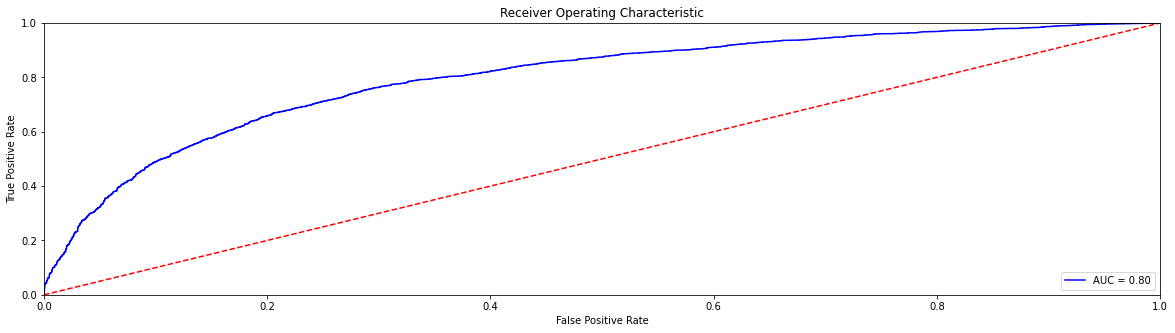

In [19]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

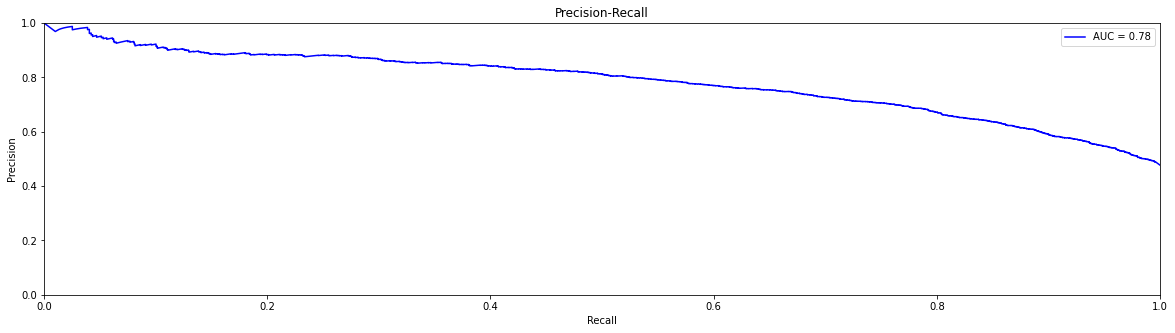

In [20]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance spacial tokens (agg: attention + tensor net)

In [30]:
df = pd.read_csv('../data/test_result_24.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.296445
1,1,0,0.819663
2,2,0,0.138935
3,3,0,0.540131
4,4,0,0.116912
...,...,...,...
6456,6456,0,0.108433
6457,6457,0,0.431115
6458,6458,0,0.405872
6459,6459,0,0.185552


In [31]:
roc_auc_score(df['y_true'], df['y_score'])

0.8078080677717409

In [32]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

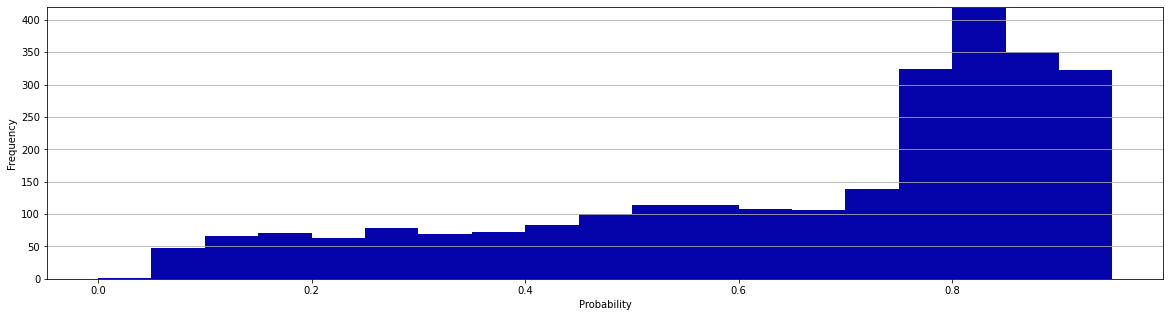

mean=0.71, median=0.80, std=0.25


In [33]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

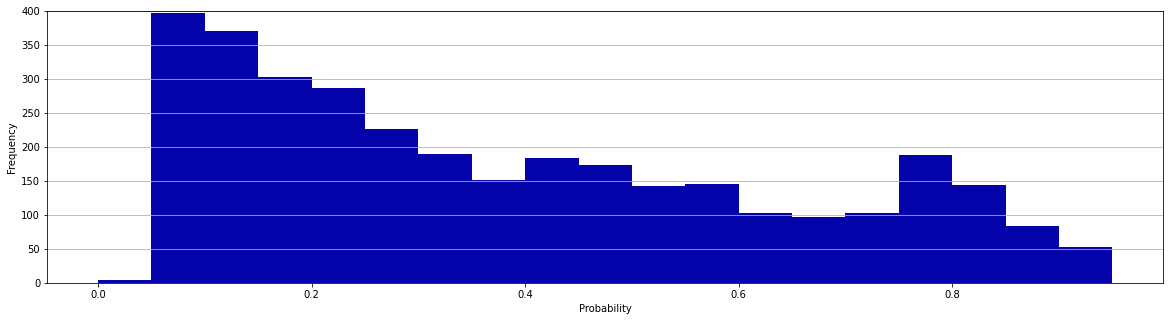

mean=0.39, median=0.32, std=0.26


In [34]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [35]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.56, r=0.94, f1=0.70
at 0.21 threshold, p=0.56, r=0.94, f1=0.70
at 0.22 threshold, p=0.57, r=0.93, f1=0.70
at 0.23 threshold, p=0.57, r=0.93, f1=0.71
at 0.24 threshold, p=0.58, r=0.92, f1=0.71
at 0.25 threshold, p=0.58, r=0.92, f1=0.71
at 0.26 threshold, p=0.59, r=0.91, f1=0.72
at 0.27 threshold, p=0.59, r=0.91, f1=0.72
at 0.28 threshold, p=0.60, r=0.90, f1=0.72
at 0.29 threshold, p=0.60, r=0.90, f1=0.72
at 0.30 threshold, p=0.61, r=0.89, f1=0.72
at 0.31 threshold, p=0.61, r=0.89, f1=0.72
at 0.32 threshold, p=0.61, r=0.89, f1=0.73
at 0.33 threshold, p=0.62, r=0.88, f1=0.73
at 0.34 threshold, p=0.62, r=0.88, f1=0.73
at 0.35 threshold, p=0.63, r=0.87, f1=0.73
at 0.36 threshold, p=0.63, r=0.87, f1=0.73
at 0.37 threshold, p=0.63, r=0.86, f1=0.73
at 0.38 threshold, p=0.64, r=0.86, f1=0.73
at 0.39 threshold, p=0.64, r=0.85, f1=0.73
at 0.40 threshold, p=0.64, r=0.85, f1=0.73
at 0.41 threshold, p=0.65, r=0.84, f1=0.73
at 0.42 threshold, p=0.65, r=0.84, f1=0.74
at 0.43 thr

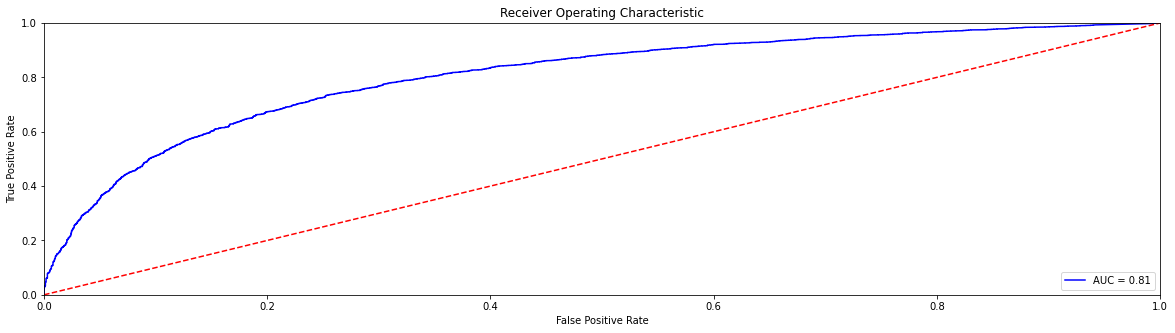

In [36]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

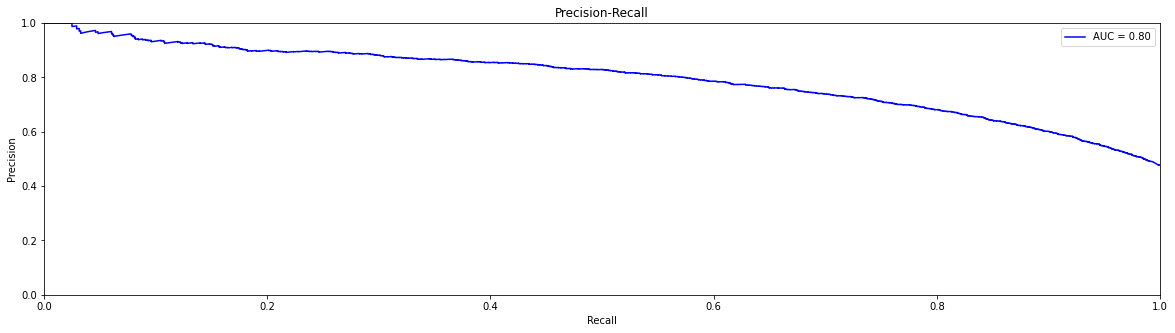

In [37]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITGNN apache balance sample all tokens (agg: attention + tensor net)

In [11]:
df = pd.read_csv('../data/test_result_26.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.039407
1,1,0,0.128982
2,2,0,0.029810
3,3,0,0.038697
4,4,0,0.030019
...,...,...,...
6418,6418,0,0.030157
6419,6419,0,0.054953
6420,6420,0,0.033168
6421,6421,0,0.048390


In [12]:
roc_auc_score(df['y_true'], df['y_score'])

0.7816095429114489

In [13]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

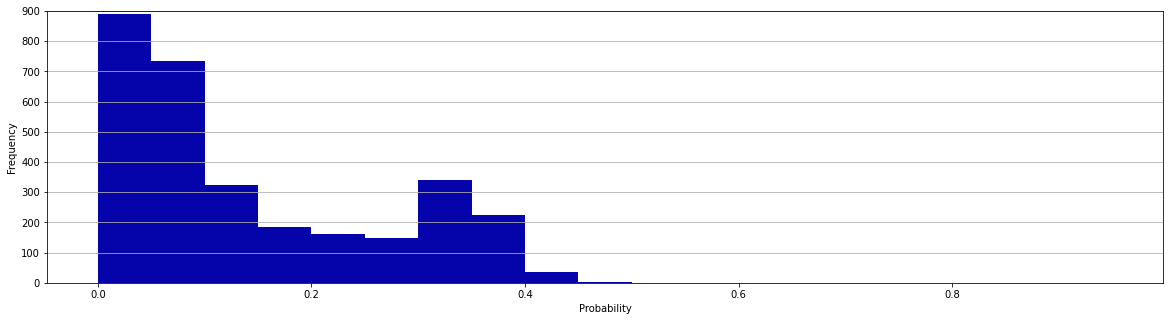

mean=0.15, median=0.09, std=0.12


In [14]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

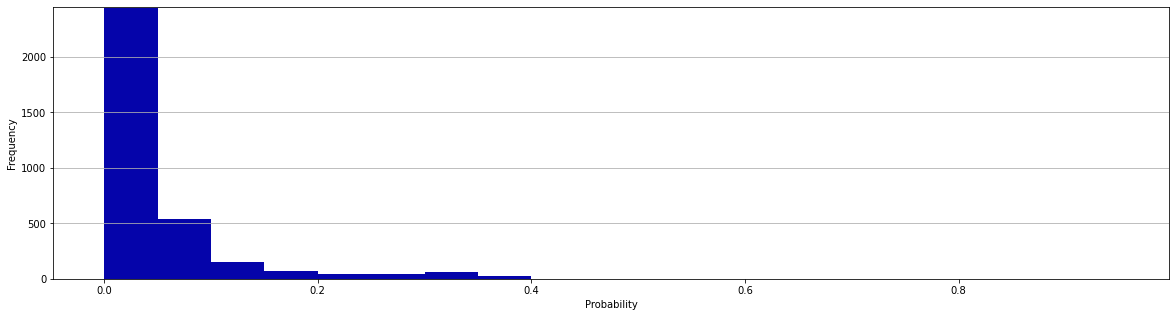

mean=0.06, median=0.04, std=0.06


In [15]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [16]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.84, r=0.30, f1=0.44
at 0.21 threshold, p=0.84, r=0.29, f1=0.43
at 0.22 threshold, p=0.84, r=0.28, f1=0.42
at 0.23 threshold, p=0.84, r=0.27, f1=0.41
at 0.24 threshold, p=0.84, r=0.26, f1=0.39
at 0.25 threshold, p=0.85, r=0.25, f1=0.38
at 0.26 threshold, p=0.85, r=0.24, f1=0.37
at 0.27 threshold, p=0.86, r=0.23, f1=0.36
at 0.28 threshold, p=0.86, r=0.22, f1=0.35
at 0.29 threshold, p=0.87, r=0.21, f1=0.34
at 0.30 threshold, p=0.88, r=0.20, f1=0.32
at 0.31 threshold, p=0.89, r=0.18, f1=0.31
at 0.32 threshold, p=0.89, r=0.17, f1=0.29
at 0.33 threshold, p=0.88, r=0.16, f1=0.26
at 0.34 threshold, p=0.89, r=0.13, f1=0.23
at 0.35 threshold, p=0.91, r=0.09, f1=0.16
at 0.36 threshold, p=0.93, r=0.06, f1=0.11
at 0.37 threshold, p=0.94, r=0.04, f1=0.08
at 0.38 threshold, p=0.97, r=0.03, f1=0.06
at 0.39 threshold, p=0.97, r=0.02, f1=0.04
at 0.40 threshold, p=1.00, r=0.01, f1=0.02
at 0.41 threshold, p=1.00, r=0.01, f1=0.02
at 0.42 threshold, p=1.00, r=0.01, f1=0.01
at 0.43 thr

/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anacond

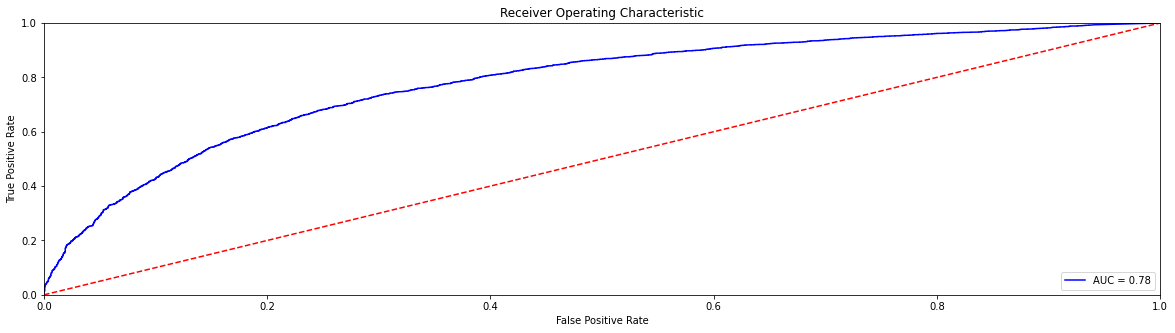

In [22]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

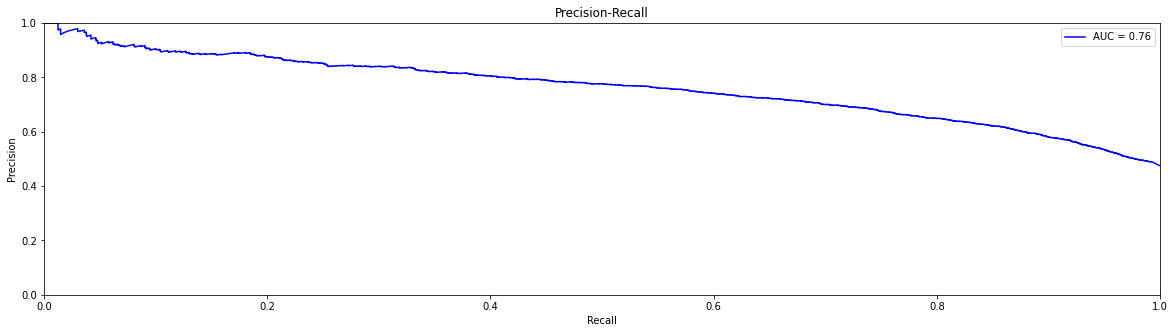

In [23]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine apache unbalanced

In [39]:
df = pd.read_csv('../data/apache_unbalanced_100k_nosmote_nometrics_result.csv')
df

,Unnamed: 0,prob,pred,actual,test_commit
0,0,0.603333,1,1,0005467e3f5211378c2932f0ebc9b5b2c73d565a
1,1,0.086667,0,0,000775ffae617e61ee57901d26c8dfb607809ab6
2,2,0.615000,1,0,00095a2ef9442e3fd86c04876c9d91f2f8b23ad8
3,3,0.013333,0,1,000a84cb4afce33e6d6601f65955f2de9924cf8a
4,4,0.090000,0,0,0010cc2af4c2823a4d3bc3e4f379a063d4a60c27
...,...,...,...,...,...
6456,6456,0.030000,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3
6457,6457,0.370000,0,1,ffef0871c2d64bcbc171b129c2057b572c2f41b2
6458,6458,0.846667,1,1,fff86f3a6d03fdabfba3c1dc8d3a04c48be93aa8
6459,6459,0.483333,0,1,fffb9c5b5cac1a669f22dd99860774d6c0fdb94b


In [41]:
roc_auc_score(df['actual'], df['prob'])

0.8347327291338977

In [43]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

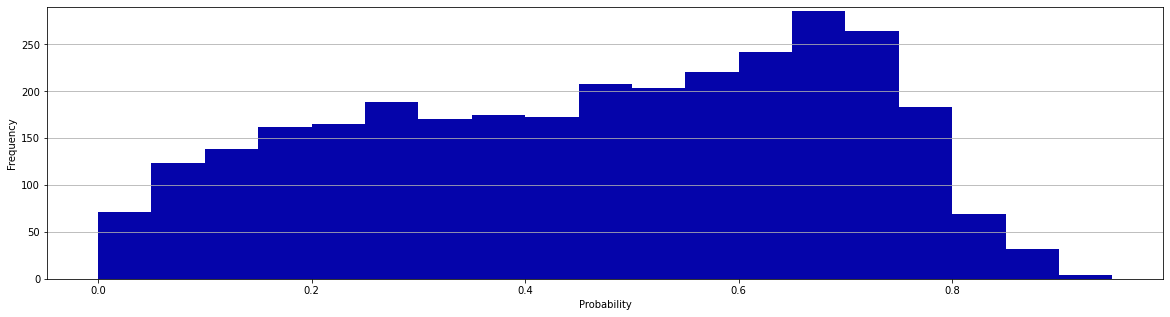

mean=0.47, median=0.49, std=0.22


In [46]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

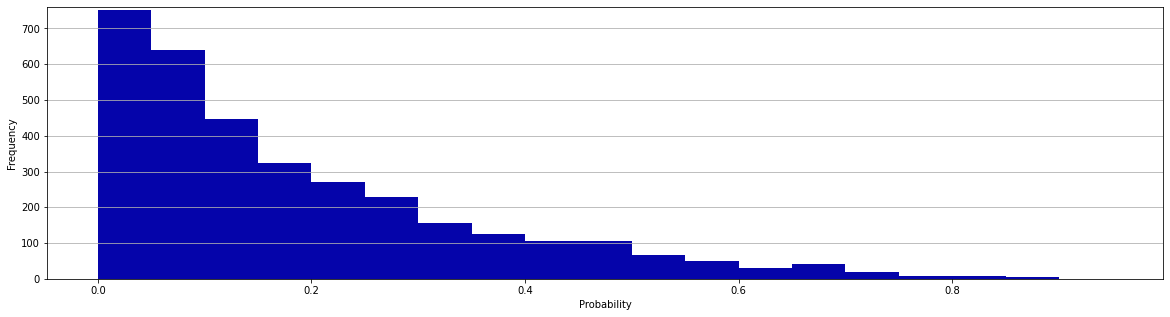

mean=0.19, median=0.13, std=0.17


In [47]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [48]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.68, r=0.84, f1=0.75
at 0.21 threshold, p=0.69, r=0.83, f1=0.75
at 0.22 threshold, p=0.70, r=0.82, f1=0.75
at 0.23 threshold, p=0.71, r=0.80, f1=0.75
at 0.24 threshold, p=0.71, r=0.80, f1=0.75
at 0.25 threshold, p=0.72, r=0.78, f1=0.75
at 0.26 threshold, p=0.73, r=0.77, f1=0.75
at 0.27 threshold, p=0.74, r=0.76, f1=0.75
at 0.28 threshold, p=0.75, r=0.75, f1=0.75
at 0.29 threshold, p=0.75, r=0.74, f1=0.74
at 0.30 threshold, p=0.76, r=0.72, f1=0.74
at 0.31 threshold, p=0.76, r=0.71, f1=0.74
at 0.32 threshold, p=0.77, r=0.70, f1=0.73
at 0.33 threshold, p=0.78, r=0.69, f1=0.73
at 0.34 threshold, p=0.78, r=0.68, f1=0.73
at 0.35 threshold, p=0.79, r=0.67, f1=0.72
at 0.36 threshold, p=0.79, r=0.66, f1=0.72
at 0.37 threshold, p=0.80, r=0.65, f1=0.71
at 0.38 threshold, p=0.80, r=0.64, f1=0.71
at 0.39 threshold, p=0.81, r=0.62, f1=0.70
at 0.40 threshold, p=0.81, r=0.61, f1=0.70
at 0.41 threshold, p=0.82, r=0.60, f1=0.69
at 0.42 threshold, p=0.82, r=0.59, f1=0.69
at 0.43 thr

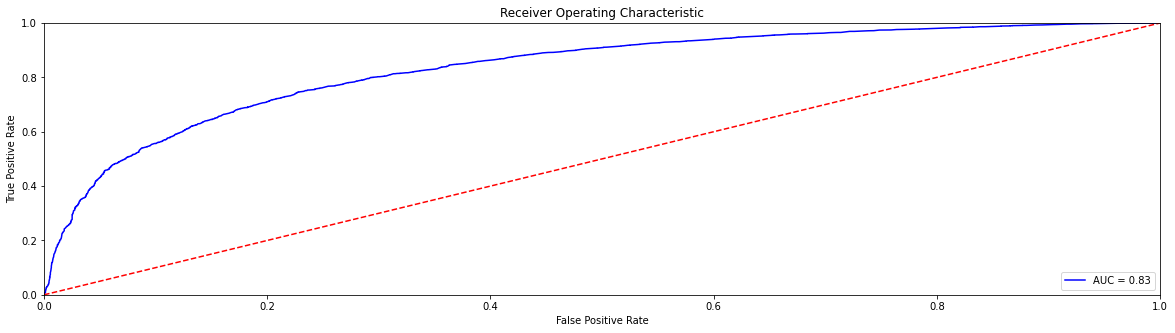

In [49]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

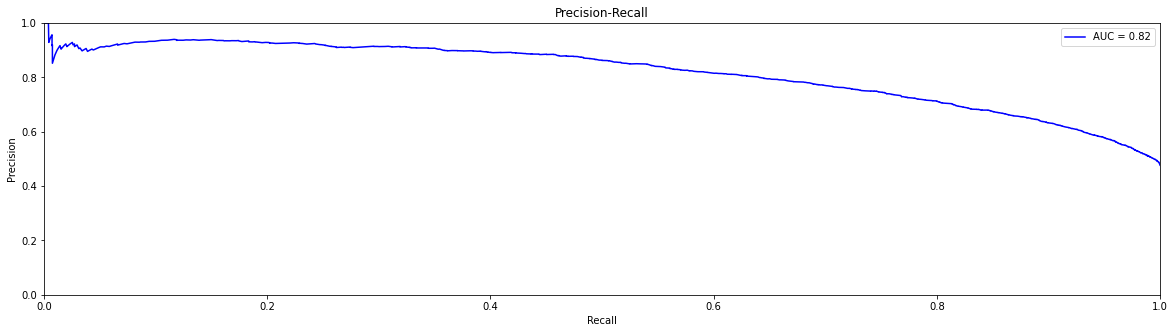

In [50]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine apache balanced

In [52]:
df = pd.read_csv('../data/apache_balanced_100k_nosmote_nometrics_result.csv')
df

,Unnamed: 0,prob,pred,actual,test_commit
0,0,0.796667,1,1,0005467e3f5211378c2932f0ebc9b5b2c73d565a
1,1,0.486667,0,0,000775ffae617e61ee57901d26c8dfb607809ab6
2,2,0.863333,1,0,00095a2ef9442e3fd86c04876c9d91f2f8b23ad8
3,3,0.491333,0,1,000a84cb4afce33e6d6601f65955f2de9924cf8a
4,4,0.203333,0,0,0010cc2af4c2823a4d3bc3e4f379a063d4a60c27
...,...,...,...,...,...
6456,6456,0.023333,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3
6457,6457,0.690000,1,1,ffef0871c2d64bcbc171b129c2057b572c2f41b2
6458,6458,0.946667,1,1,fff86f3a6d03fdabfba3c1dc8d3a04c48be93aa8
6459,6459,0.846667,1,1,fffb9c5b5cac1a669f22dd99860774d6c0fdb94b


In [53]:
roc_auc_score(df['actual'], df['prob'])

0.8224147235681951

In [54]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

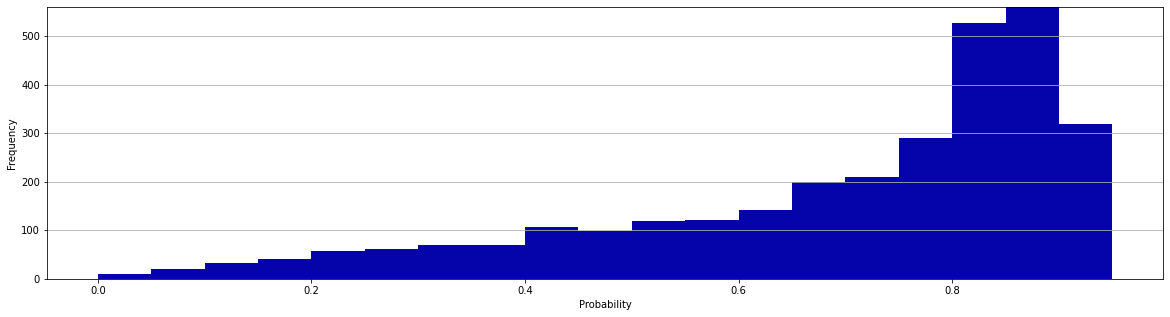

mean=0.70, median=0.78, std=0.21


In [55]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

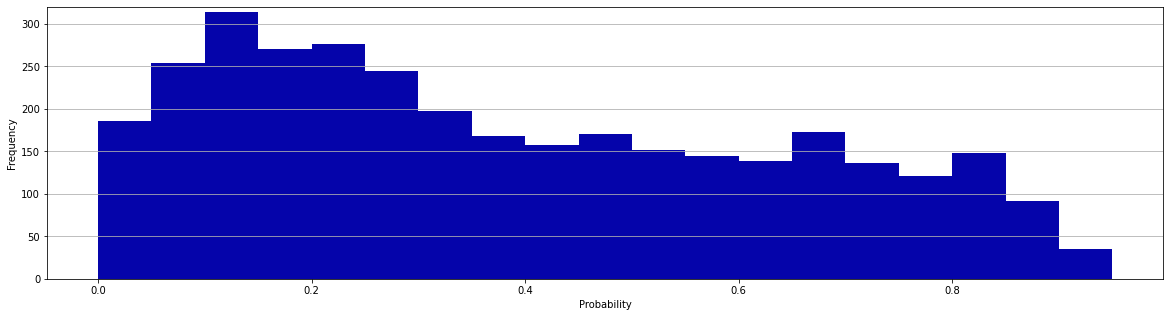

mean=0.39, median=0.34, std=0.26


In [56]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [57]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.56, r=0.97, f1=0.71
at 0.21 threshold, p=0.56, r=0.96, f1=0.71
at 0.22 threshold, p=0.57, r=0.96, f1=0.71
at 0.23 threshold, p=0.57, r=0.95, f1=0.72
at 0.24 threshold, p=0.58, r=0.95, f1=0.72
at 0.25 threshold, p=0.58, r=0.95, f1=0.72
at 0.26 threshold, p=0.59, r=0.94, f1=0.73
at 0.27 threshold, p=0.60, r=0.94, f1=0.73
at 0.28 threshold, p=0.60, r=0.94, f1=0.73
at 0.29 threshold, p=0.61, r=0.93, f1=0.73
at 0.30 threshold, p=0.61, r=0.93, f1=0.74
at 0.31 threshold, p=0.61, r=0.92, f1=0.74
at 0.32 threshold, p=0.62, r=0.92, f1=0.74
at 0.33 threshold, p=0.62, r=0.91, f1=0.74
at 0.34 threshold, p=0.63, r=0.91, f1=0.74
at 0.35 threshold, p=0.63, r=0.91, f1=0.74
at 0.36 threshold, p=0.63, r=0.90, f1=0.74
at 0.37 threshold, p=0.64, r=0.89, f1=0.74
at 0.38 threshold, p=0.64, r=0.89, f1=0.75
at 0.39 threshold, p=0.65, r=0.89, f1=0.75
at 0.40 threshold, p=0.65, r=0.88, f1=0.75
at 0.41 threshold, p=0.65, r=0.87, f1=0.75
at 0.42 threshold, p=0.65, r=0.86, f1=0.75
at 0.43 thr

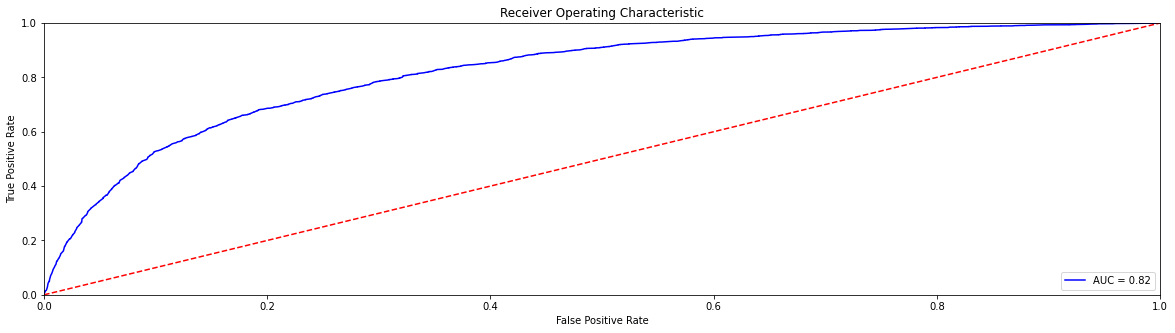

In [58]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

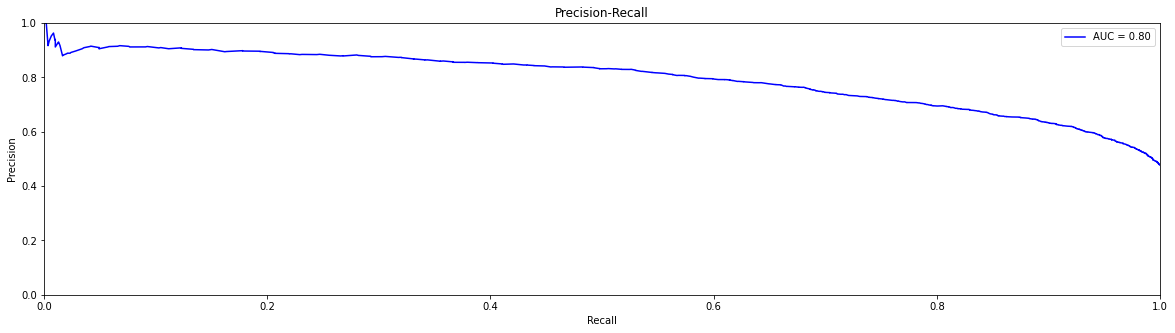

In [59]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine apache balanced (with smote)

In [8]:
df = pd.read_csv('../data/apache_balanced_100k_smote_nometrics_result.csv')
df

,Unnamed: 0,prob,pred,actual,test_commit
0,0,0.790000,1,1,0005467e3f5211378c2932f0ebc9b5b2c73d565a
1,1,0.443333,0,0,000775ffae617e61ee57901d26c8dfb607809ab6
2,2,0.903333,1,0,00095a2ef9442e3fd86c04876c9d91f2f8b23ad8
3,3,0.471667,0,1,000a84cb4afce33e6d6601f65955f2de9924cf8a
4,4,0.216667,0,0,0010cc2af4c2823a4d3bc3e4f379a063d4a60c27
...,...,...,...,...,...
6456,6456,0.013333,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3
6457,6457,0.743333,1,1,ffef0871c2d64bcbc171b129c2057b572c2f41b2
6458,6458,0.936667,1,1,fff86f3a6d03fdabfba3c1dc8d3a04c48be93aa8
6459,6459,0.816667,1,1,fffb9c5b5cac1a669f22dd99860774d6c0fdb94b


In [9]:
roc_auc_score(df['actual'], df['prob'])

0.8225472402912295

In [10]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

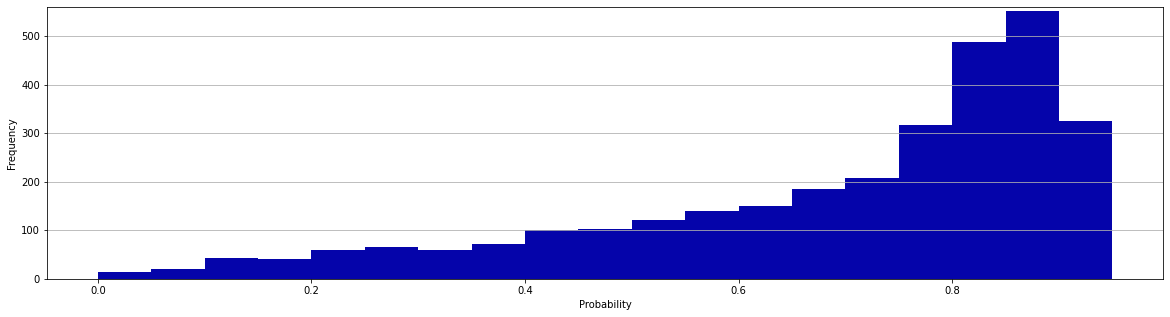

mean=0.70, median=0.78, std=0.22


In [11]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

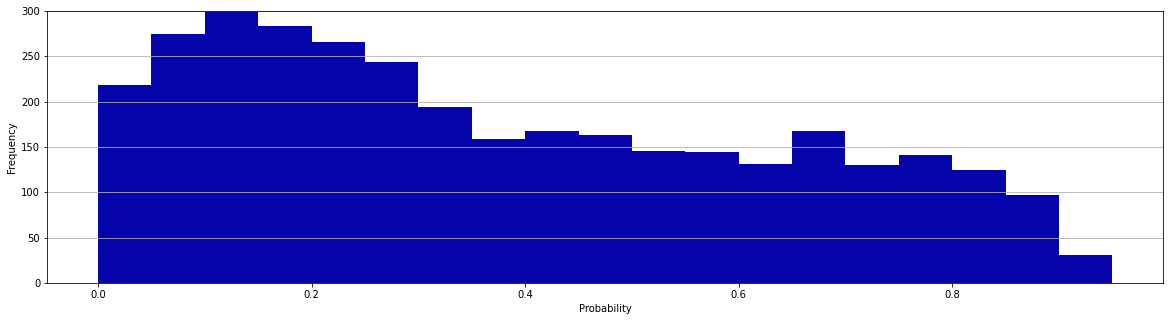

mean=0.38, median=0.32, std=0.26


In [12]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [13]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.56, r=0.96, f1=0.71
at 0.21 threshold, p=0.57, r=0.96, f1=0.71
at 0.22 threshold, p=0.57, r=0.95, f1=0.72
at 0.23 threshold, p=0.58, r=0.95, f1=0.72
at 0.24 threshold, p=0.58, r=0.95, f1=0.72
at 0.25 threshold, p=0.59, r=0.94, f1=0.73
at 0.26 threshold, p=0.59, r=0.94, f1=0.73
at 0.27 threshold, p=0.60, r=0.93, f1=0.73
at 0.28 threshold, p=0.60, r=0.93, f1=0.73
at 0.29 threshold, p=0.61, r=0.93, f1=0.74
at 0.30 threshold, p=0.61, r=0.92, f1=0.74
at 0.31 threshold, p=0.62, r=0.92, f1=0.74
at 0.32 threshold, p=0.62, r=0.92, f1=0.74
at 0.33 threshold, p=0.63, r=0.91, f1=0.74
at 0.34 threshold, p=0.63, r=0.91, f1=0.74
at 0.35 threshold, p=0.63, r=0.90, f1=0.75
at 0.36 threshold, p=0.64, r=0.90, f1=0.75
at 0.37 threshold, p=0.64, r=0.89, f1=0.75
at 0.38 threshold, p=0.64, r=0.89, f1=0.75
at 0.39 threshold, p=0.65, r=0.88, f1=0.75
at 0.40 threshold, p=0.65, r=0.88, f1=0.75
at 0.41 threshold, p=0.66, r=0.87, f1=0.75
at 0.42 threshold, p=0.66, r=0.86, f1=0.75
at 0.43 thr

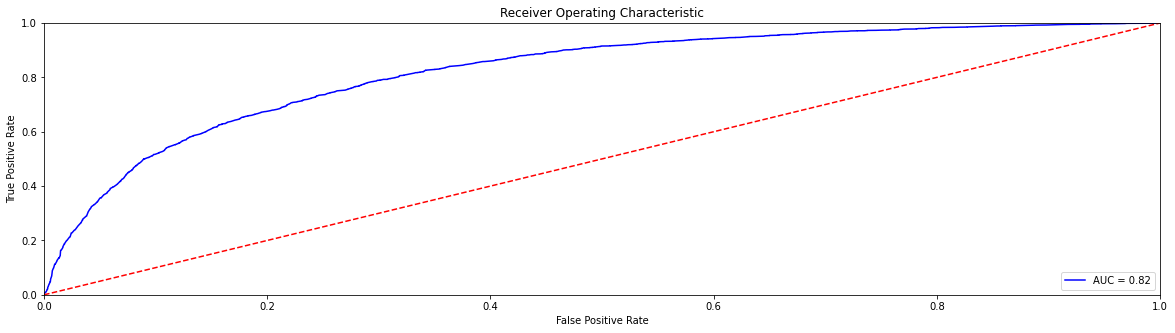

In [14]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

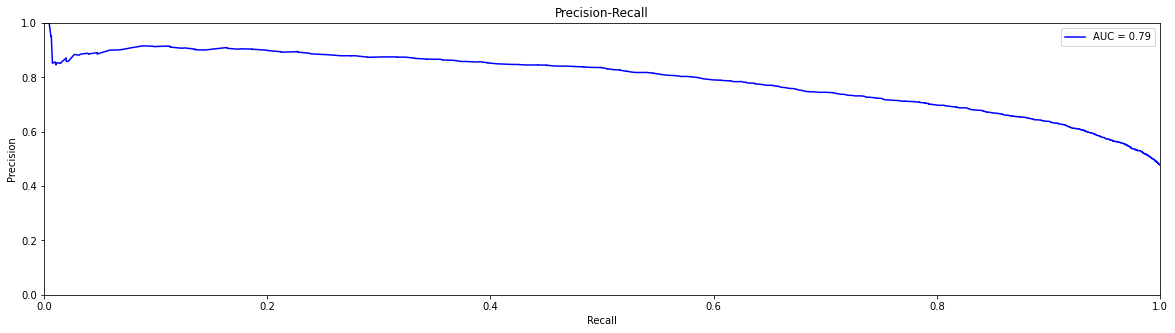

In [15]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine apache balanced (with smote and some metrics)

In [3]:
df = pd.read_csv('../data/apache_balanced_100k_smote_somemetrics_result_b.csv')
df

,Unnamed: 0,prob,pred,actual,test_commit
0,0,0.790000,1,1,0005467e3f5211378c2932f0ebc9b5b2c73d565a
1,1,0.476667,0,0,000775ffae617e61ee57901d26c8dfb607809ab6
2,2,0.826667,1,0,00095a2ef9442e3fd86c04876c9d91f2f8b23ad8
3,3,0.460000,0,1,000a84cb4afce33e6d6601f65955f2de9924cf8a
4,4,0.213333,0,0,0010cc2af4c2823a4d3bc3e4f379a063d4a60c27
...,...,...,...,...,...
6456,6456,0.014497,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3
6457,6457,0.760000,1,1,ffef0871c2d64bcbc171b129c2057b572c2f41b2
6458,6458,0.933333,1,1,fff86f3a6d03fdabfba3c1dc8d3a04c48be93aa8
6459,6459,0.800000,1,1,fffb9c5b5cac1a669f22dd99860774d6c0fdb94b


In [4]:
roc_auc_score(df['actual'], df['prob'])

0.8297927361630455

In [5]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

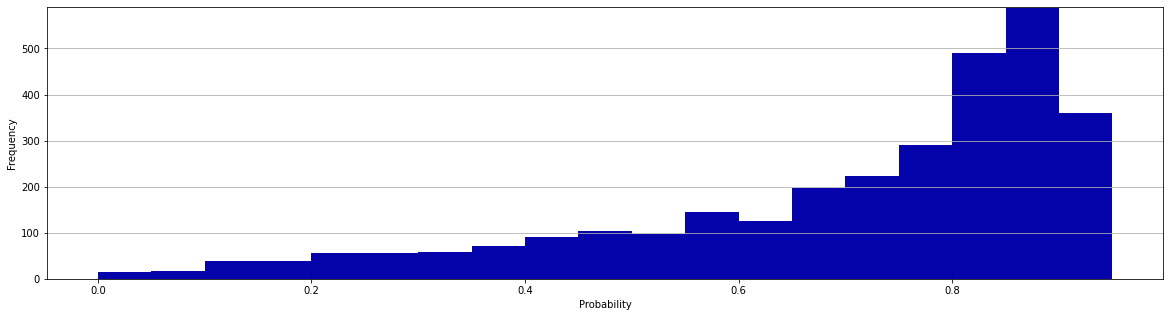

mean=0.71, median=0.78, std=0.21


In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

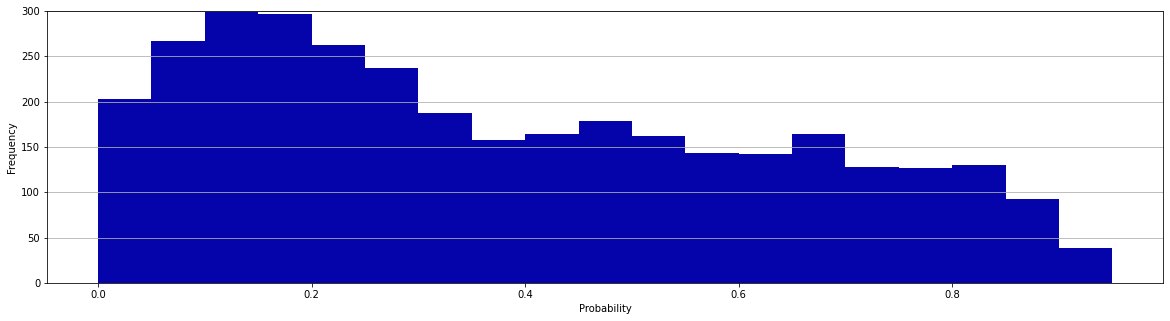

mean=0.38, median=0.33, std=0.26


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [8]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.56, r=0.96, f1=0.71
at 0.21 threshold, p=0.57, r=0.96, f1=0.72
at 0.22 threshold, p=0.57, r=0.96, f1=0.72
at 0.23 threshold, p=0.58, r=0.95, f1=0.72
at 0.24 threshold, p=0.58, r=0.95, f1=0.72
at 0.25 threshold, p=0.59, r=0.95, f1=0.73
at 0.26 threshold, p=0.59, r=0.94, f1=0.73
at 0.27 threshold, p=0.60, r=0.94, f1=0.73
at 0.28 threshold, p=0.60, r=0.94, f1=0.73
at 0.29 threshold, p=0.61, r=0.93, f1=0.74
at 0.30 threshold, p=0.61, r=0.93, f1=0.74
at 0.31 threshold, p=0.62, r=0.92, f1=0.74
at 0.32 threshold, p=0.62, r=0.92, f1=0.74
at 0.33 threshold, p=0.62, r=0.92, f1=0.74
at 0.34 threshold, p=0.63, r=0.91, f1=0.74
at 0.35 threshold, p=0.63, r=0.91, f1=0.75
at 0.36 threshold, p=0.64, r=0.90, f1=0.75
at 0.37 threshold, p=0.64, r=0.90, f1=0.75
at 0.38 threshold, p=0.64, r=0.89, f1=0.75
at 0.39 threshold, p=0.65, r=0.89, f1=0.75
at 0.40 threshold, p=0.65, r=0.88, f1=0.75
at 0.41 threshold, p=0.65, r=0.88, f1=0.75
at 0.42 threshold, p=0.66, r=0.87, f1=0.75
at 0.43 thr

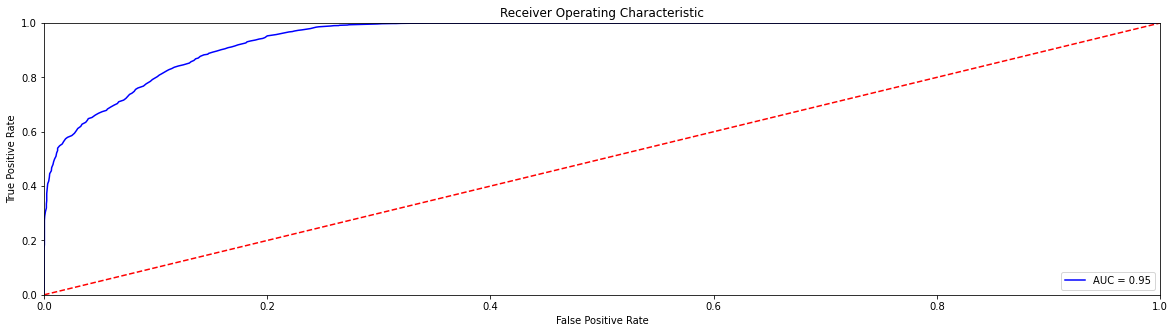

In [11]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

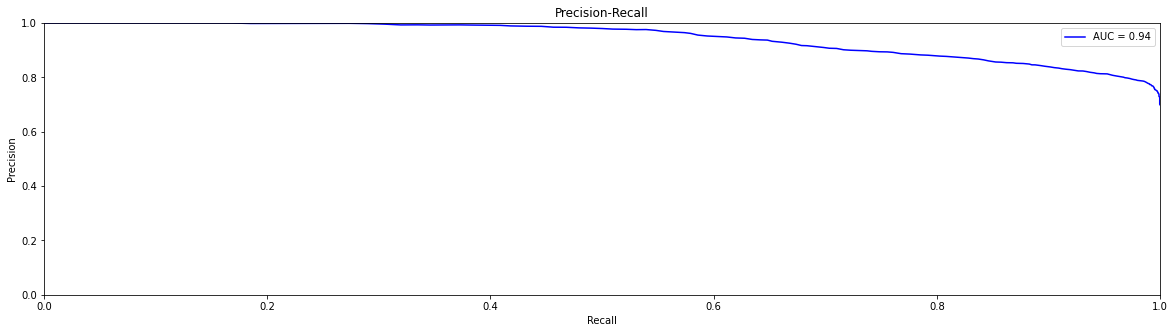

In [12]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine apache balanced (with smote and all kamei metrics)

In [23]:
df = pd.read_csv('../data/apache_balanced_100k_smote_allmetrics_result.csv')
df

,Unnamed: 0,prob,pred,actual,test_commit
0,0,0.836667,1,1,0005467e3f5211378c2932f0ebc9b5b2c73d565a
1,1,0.510000,1,0,000775ffae617e61ee57901d26c8dfb607809ab6
2,2,0.860000,1,0,00095a2ef9442e3fd86c04876c9d91f2f8b23ad8
3,3,0.450000,0,1,000a84cb4afce33e6d6601f65955f2de9924cf8a
4,4,0.276667,0,0,0010cc2af4c2823a4d3bc3e4f379a063d4a60c27
...,...,...,...,...,...
6456,6456,0.093333,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3
6457,6457,0.757500,1,1,ffef0871c2d64bcbc171b129c2057b572c2f41b2
6458,6458,0.943333,1,1,fff86f3a6d03fdabfba3c1dc8d3a04c48be93aa8
6459,6459,0.750000,1,1,fffb9c5b5cac1a669f22dd99860774d6c0fdb94b


In [25]:
df = pd.concat([df[df['actual'] == 1].sample(frac=0.15), df[df['actual'] == 0]])
df

,Unnamed: 0,prob,pred,actual,test_commit
2101,2101,0.790000,1,1,529e1ccc68f38cb627c2b0baabcd26c2f218a15e
5353,5353,0.916667,1,1,d3fed078cc47982822a29db3c8b03a61dcb5e7e9
5016,5016,0.701111,1,1,c5e723c533a336802ba0fa6b9e9f361182db16ff
3899,3899,0.836667,1,1,9a3f7c0715f25e0d2f219b4cd2518cae284462ea
4668,4668,0.866667,1,1,b814a16b968d144802d08523b5c359d6706f5632
...,...,...,...,...,...
6451,6451,0.284167,0,0,ffbd0c60e956d0620512ae050390badb2785ae6a
6452,6452,0.136667,0,0,ffc733a414d4ae10a1d4a25194d15ebc0a6ca3f3
6454,6454,0.136667,0,0,ffd3eb4fc8616f487d556d96bb7bbb61d38f9b03
6456,6456,0.093333,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3


In [26]:
roc_auc_score(df['actual'], df['prob'])

0.8532512359435437

In [27]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

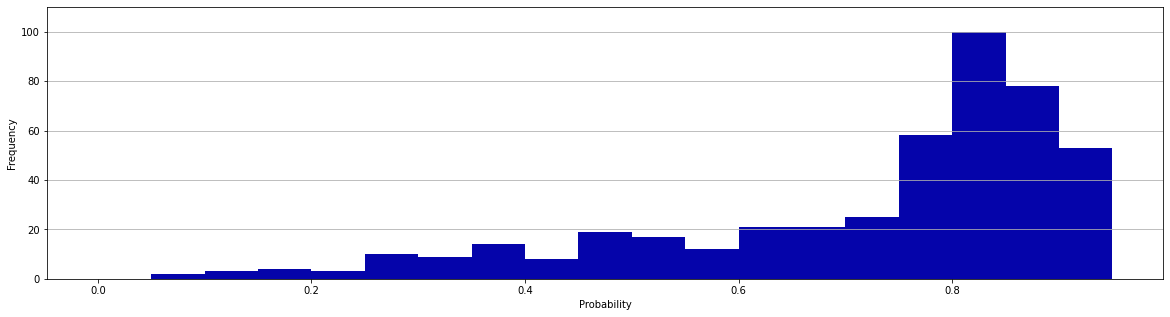

mean=0.73, median=0.80, std=0.20


In [28]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

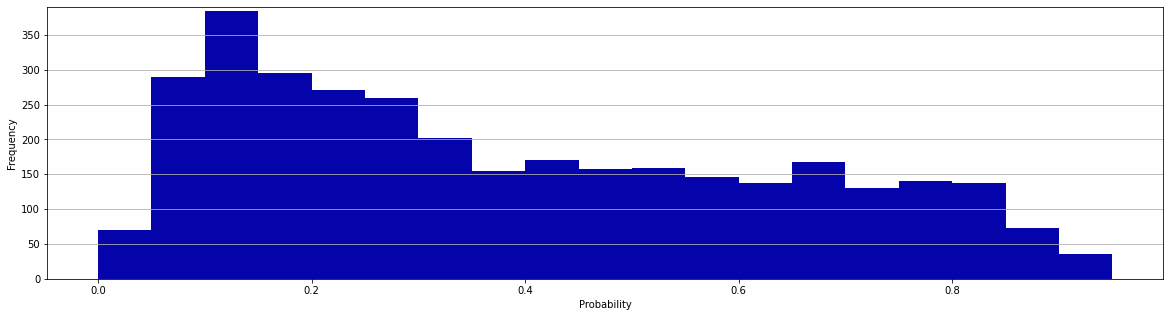

mean=0.39, median=0.33, std=0.25


In [29]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [30]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.16, r=0.98, f1=0.28
at 0.21 threshold, p=0.17, r=0.98, f1=0.28
at 0.22 threshold, p=0.17, r=0.97, f1=0.29
at 0.23 threshold, p=0.17, r=0.97, f1=0.29
at 0.24 threshold, p=0.18, r=0.97, f1=0.30
at 0.25 threshold, p=0.18, r=0.97, f1=0.30
at 0.26 threshold, p=0.18, r=0.97, f1=0.31
at 0.27 threshold, p=0.19, r=0.97, f1=0.31
at 0.28 threshold, p=0.19, r=0.96, f1=0.32
at 0.29 threshold, p=0.19, r=0.96, f1=0.32
at 0.30 threshold, p=0.20, r=0.95, f1=0.32
at 0.31 threshold, p=0.20, r=0.95, f1=0.33
at 0.32 threshold, p=0.20, r=0.95, f1=0.33
at 0.33 threshold, p=0.20, r=0.94, f1=0.34
at 0.34 threshold, p=0.21, r=0.94, f1=0.34
at 0.35 threshold, p=0.21, r=0.93, f1=0.34
at 0.36 threshold, p=0.21, r=0.93, f1=0.35
at 0.37 threshold, p=0.22, r=0.92, f1=0.35
at 0.38 threshold, p=0.22, r=0.92, f1=0.35
at 0.39 threshold, p=0.22, r=0.91, f1=0.36
at 0.40 threshold, p=0.22, r=0.90, f1=0.36
at 0.41 threshold, p=0.23, r=0.89, f1=0.36
at 0.42 threshold, p=0.23, r=0.89, f1=0.37
at 0.43 thr

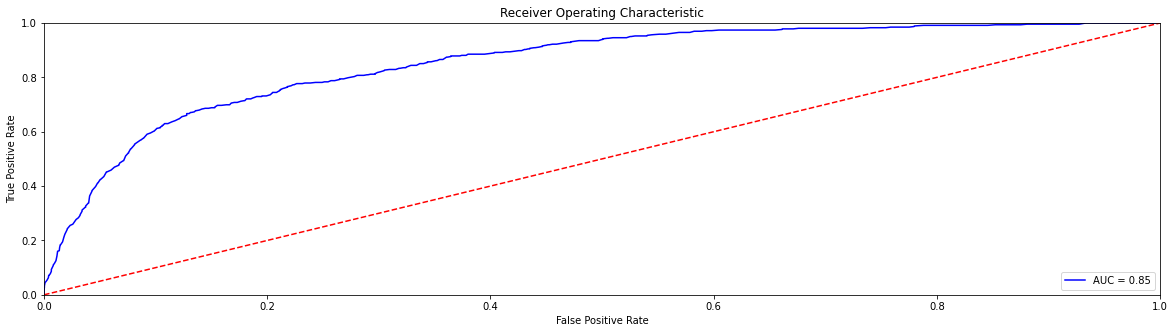

In [32]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

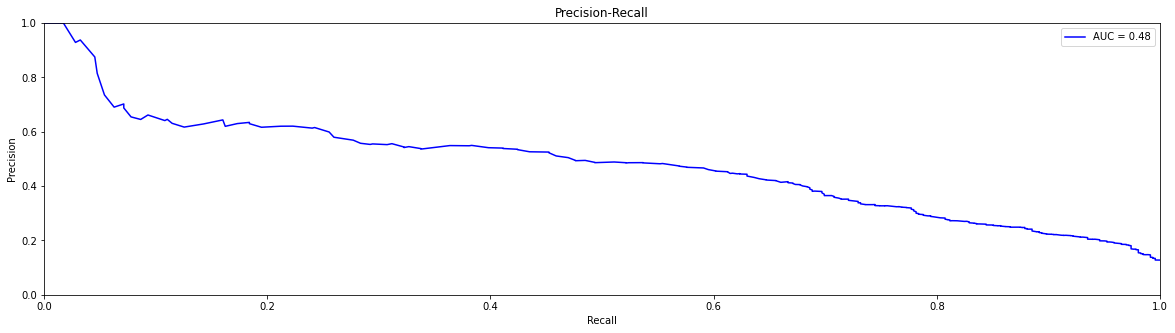

In [31]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine apache balanced (sample) (with smote)

In [3]:
df = pd.read_csv('../data/apache_balanced_sample_all_smote_nometrics_result.csv')
df

,Unnamed: 0,prob,pred,actual,test_commit
0,0,0.630000,1,1,0005467e3f5211378c2932f0ebc9b5b2c73d565a
1,1,0.270000,0,0,000775ffae617e61ee57901d26c8dfb607809ab6
2,2,0.630000,1,0,00095a2ef9442e3fd86c04876c9d91f2f8b23ad8
3,3,0.270000,0,1,000a84cb4afce33e6d6601f65955f2de9924cf8a
4,4,0.156667,0,0,0010cc2af4c2823a4d3bc3e4f379a063d4a60c27
...,...,...,...,...,...
6456,6456,0.000000,0,0,ffe430237a44b1ebad31171bdf81ab7487ef5ce3
6457,6457,0.510000,1,1,ffef0871c2d64bcbc171b129c2057b572c2f41b2
6458,6458,0.846667,1,1,fff86f3a6d03fdabfba3c1dc8d3a04c48be93aa8
6459,6459,0.763333,1,1,fffb9c5b5cac1a669f22dd99860774d6c0fdb94b


In [4]:
roc_auc_score(df['actual'], df['prob'])

0.7890659779638133

In [5]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

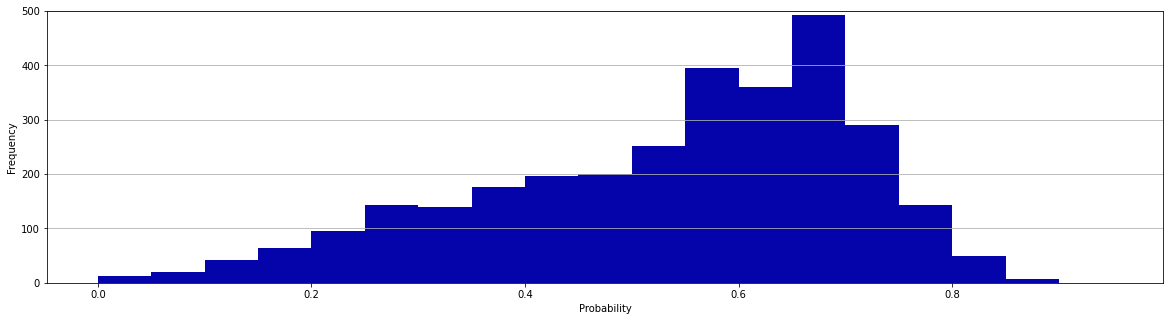

mean=0.54, median=0.57, std=0.17


In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

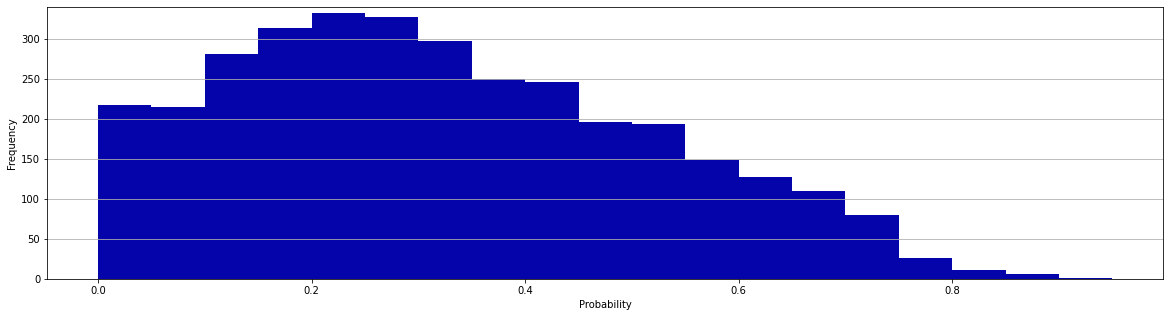

mean=0.32, median=0.30, std=0.19


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [8]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.56, r=0.96, f1=0.70
at 0.21 threshold, p=0.56, r=0.95, f1=0.71
at 0.22 threshold, p=0.57, r=0.94, f1=0.71
at 0.23 threshold, p=0.57, r=0.94, f1=0.71
at 0.24 threshold, p=0.58, r=0.93, f1=0.71
at 0.25 threshold, p=0.59, r=0.92, f1=0.72
at 0.26 threshold, p=0.59, r=0.92, f1=0.72
at 0.27 threshold, p=0.60, r=0.91, f1=0.72
at 0.28 threshold, p=0.60, r=0.90, f1=0.72
at 0.29 threshold, p=0.61, r=0.89, f1=0.72
at 0.30 threshold, p=0.62, r=0.88, f1=0.72
at 0.31 threshold, p=0.62, r=0.87, f1=0.73
at 0.32 threshold, p=0.63, r=0.86, f1=0.73
at 0.33 threshold, p=0.63, r=0.85, f1=0.73
at 0.34 threshold, p=0.64, r=0.84, f1=0.73
at 0.35 threshold, p=0.65, r=0.83, f1=0.73
at 0.36 threshold, p=0.65, r=0.82, f1=0.73
at 0.37 threshold, p=0.66, r=0.81, f1=0.73
at 0.38 threshold, p=0.67, r=0.80, f1=0.72
at 0.39 threshold, p=0.67, r=0.78, f1=0.72
at 0.40 threshold, p=0.68, r=0.77, f1=0.72
at 0.41 threshold, p=0.68, r=0.76, f1=0.72
at 0.42 threshold, p=0.69, r=0.74, f1=0.72
at 0.43 thr

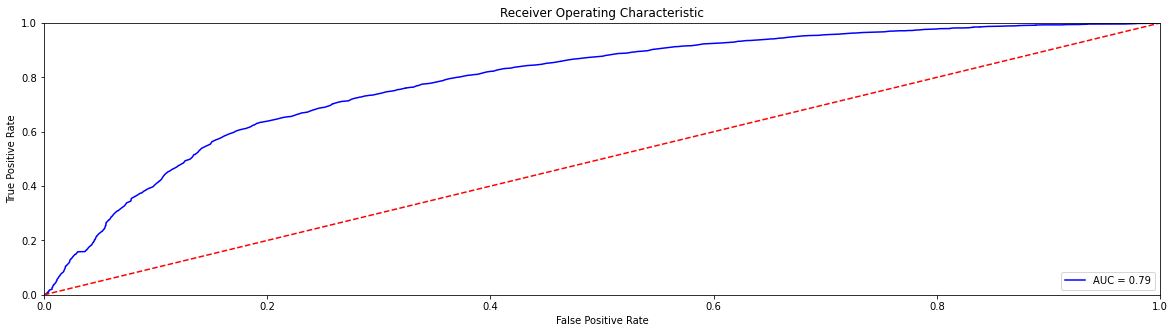

In [9]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

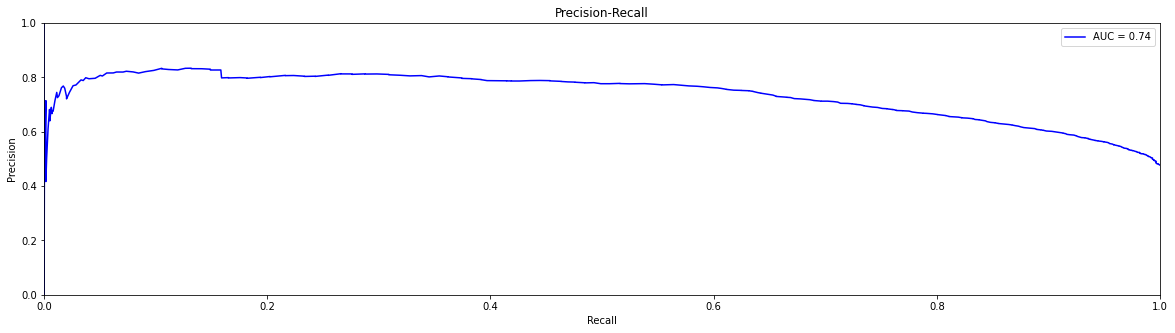

In [10]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()